# Homework 1: How much data do you need? Using CIFAR-100
Advanced AI Methods \\
Dr. Kerby

##Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import tensorflow_datasets as tfds
import pandas as pd
import cv2
import copy
import random
from sklearn.metrics import confusion_matrix
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


np.random.seed(42)
tf.random.set_seed(42)

Mounted at /content/drive


## *Data*

In [ ]:
(x_train_full, y_train_full), (x_test_full, y_test_full) = keras.datasets.cifar100.load_data()

169017344/169001437 [==============================] - 3s 0us/step


In [ ]:
x_train_full[0].shape[1:]

(32, 3)

In [ ]:
# sub class names based off index 
fine_labels=  np.array(['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
              'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
              'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
              'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 
              'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
              'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
              'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
              'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
              'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
              'willow_tree', 'wolf', 'woman', 'worm'])
  
# super class names based off index 
coarse_labels= np.array(['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 
                'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 
                'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores',
                'medium_mammals', 'non-insect_invertebrates', 
                'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2'])

fine_id_coarse_id_map = {
    
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7, 8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18,
    14: 7, 15:11, 16:3, 17: 9, 18: 7, 19: 11, 20: 6,21: 11,22:5, 23:10,24:7,25:6,26:13,27:15,28: 3,
    29: 15,30: 0,31: 11,32: 1, 33: 10, 34: 12,35: 14, 36: 16, 37: 9, 38: 11, 39: 5, 40: 5, 41: 19,42: 8,
    43: 8,44: 15, 45: 13, 46: 14,47: 17,48: 18,49: 10,50: 16,51: 4,52: 17,53: 4,54: 2,55: 0,56: 17,57: 4,
    58: 18,59: 17,60: 10,61: 3,62: 2,63: 12,64: 12,65: 16,66: 12,67: 1,68: 9,69: 19,70: 2,71: 10,72: 0,73: 1, 
    74: 16,75: 12,76: 9,77: 13,78: 15,79: 13,80:16, 81:19, 82: 2,83: 4,84: 6,85: 19,86:5,87:5,88:8,89:19,
    90: 18, 91: 1,92: 2,93: 15,94: 6,95: 0,96: 17,97: 8,98: 14, 99: 13
    
    }

coarse_id_fine_id = {0: [4, 30, 55, 72, 95],
1: [1, 32, 67, 73, 91],
2: [54, 62, 70, 82, 92],
3: [9, 10, 16, 28, 61],
4: [0, 51, 53, 57, 83],
5: [22, 39, 40, 86, 87],
6: [5, 20, 25, 84, 94],
7: [6, 7, 14, 18, 24],
8: [3, 42, 43, 88, 97],
9: [12, 17, 37, 68, 76],
10: [23, 33, 49, 60, 71],
11: [15, 19, 21, 31, 38],
12: [34, 63, 64, 66, 75],
13: [26, 45, 77, 79, 99],
14: [2, 11, 35, 46, 98],
15: [27, 29, 44, 78, 93],
16: [36, 50, 65, 74, 80],
17: [47, 52, 56, 59, 96],
18: [8, 13, 48, 58, 90],
19: [41, 69, 81, 85, 89]}

# [63, 50]

In [ ]:
(x_train_coarse_full, y_train_coarse_full), (x_test_coarse_full, y_test_coarse_full) = keras.datasets.cifar100.load_data(label_mode="coarse")

In [ ]:
np.unique(y_train_coarse_full)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
for k in range(len(coarse_labels)):
  temp = coarse_id_fine_id[k]
  strings = []
  for elem in temp:
    strings.append(fine_labels[elem])

  print(coarse_labels[k], str(strings))


aquatic_mammals ['beaver', 'dolphin', 'otter', 'seal', 'whale']
fish ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout']
flowers ['orchid', 'poppy', 'rose', 'sunflower', 'tulip']
food_containers ['bottle', 'bowl', 'can', 'cup', 'plate']
fruit_and_vegetables ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper']
household_electrical_devices ['clock', 'keyboard', 'lamp', 'telephone', 'television']
household_furniture ['bed', 'chair', 'couch', 'table', 'wardrobe']
insects ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach']
large_carnivores ['bear', 'leopard', 'lion', 'tiger', 'wolf']
large_man-made_outdoor_things ['bridge', 'castle', 'house', 'road', 'skyscraper']
large_natural_outdoor_scenes ['cloud', 'forest', 'mountain', 'plain', 'sea']
large_omnivores_and_herbivores ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo']
medium_mammals ['fox', 'porcupine', 'possum', 'raccoon', 'skunk']
non-insect_invertebrates ['crab', 'lobster', 'snail', 'spider', 'worm']
people ['baby',

##Helper Functions

In [ ]:
def preprocess(image, label): 
  # image = tf.image.grayscale_to_rgb(image) 
  image = tf.image.resize(image, [224, 224])
  return (image, label)

def data_aug(image, label):
  image = tf.image.random_flip_left_right(image)
  return (image, label)

def check_subclasses(x, y):
  features = []
  labels = []
  index = 0
  while index < 100:
    for feature, target in zip(x, y):
      if target[0] == index:
        features.append(feature)
        labels.append(target)
        index += 1
    else:
      continue

  return np.array(features), np.array(labels)


def plot_train_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


def get_predictions(array, no_features=False, binary=False):
  labs = [] # labels list
  pred = [] # predictions list
  pics = [] # images list

  for images, labels in array.take(-1):
    predictions = model.predict(images)
    for label, image, prediction in zip(labels, images, predictions):
      if not no_features:
        pics.append(image.numpy())
      labs.append(label.numpy())
      if binary:
        rounded = [1 if prediction[0] > 0.5 else 0]
        pred.append(np.array(rounded))
      else:
          rounded = tf.argmax(prediction)
          pred.append(rounded.numpy())

  if no_features:
    return labs, pred

  return pics, labs, pred



def calculate_coarse_accuracy(predictions, targets):
  total = 0
  temp_pred = convert_label(predictions, fine_id_coarse_id_map)
  temp_tar = convert_label(targets, fine_id_coarse_id_map)
  
  for prediction, target in zip(temp_pred, temp_tar):
    if prediction == target:
      total += 1
  accuracy = total / len(predictions)
  print("Coarse Label(super class) accuracy: "+ str(accuracy))
  return accuracy


def convert_label(sub_class, dictionary):
  labels = []
  for elem in sub_class:
    if isinstance(elem, np.ndarray) or isinstance(elem, list):
      labels.append(np.array( [ dictionary[elem[0] ]] ))
    else:
      labels.append(np.array([dictionary[elem]]))
  return labels


def get_string_value(array, label="fine"):
  new_array = []

  for elem in array:
    if label == 'coarse':
      new_array.append(coarse_labels[elem])
    else:
      new_array.append(fine_labels[elem])

  return new_array



def filter_classes(chosen_classes, X, Y, count):
  X, Y = shuffle( X, Y)
  tracker = {}
  new_x = []
  new_y = []
  for val in chosen_classes:
    tracker[val] = 0
  
  for x, y, in zip(X, Y):
    if y[0] in chosen_classes:
      if tracker[y[0]] < count:
        tracker[y[0]] += 1
        new_x.append(x)
        new_y.append(y)

  return np.array(new_x), np.array(new_y)



def convert_to_datasets(x,y,z):
  ds_train = tf.data.Dataset.from_tensor_slices( x )
  ds_valid = tf.data.Dataset.from_tensor_slices(y)
  ds_test = tf.data.Dataset.from_tensor_slices(z)
  ds_train = ds_train.map(preprocess).map(data_aug).batch(64).prefetch(1)
  ds_valid = ds_valid.map(preprocess).batch(64).prefetch(1)
  ds_test = ds_test.map(preprocess).batch(64).prefetch(1)
  
  return ds_train, ds_valid, ds_test


def shuffle(features, targets):
    temp = list(zip(features, targets))
    random.shuffle(temp)
    shuffled_features, shuffled_targets = zip(*temp)

    return np.array(shuffled_features), np.array(shuffled_targets)



## Question 1: Create a CNN to classify CIFAR-100
Use the [CIFAR-100](https://www.tensorflow.org/datasets/catalog/cifar100) dataset. This [link](https://www.cs.toronto.edu/~kriz/cifar.html) also has some useful information.

You can utilize `keras.datasets.cifar100.load_data()` to import the dataset as `numpy ndarrays` or `tfds.load('cifar100')` to import the dataset as `tf.data.Dataset`.

You must utilize transfer learning. You are welcome to choose any of the expert CNN models available in [Keras Applications](https://keras.io/api/applications/). I think EfficientNetV2 is probably the best, but it would be fun to see if the results hold for other expert CNNs, so feel free to try a different one and we'll compare.

Your image classifier should output both labels (the coarse and fine labels). First create a classifier for all 100 classes and utilizing all available training data (500 images per class). Report your accuracy for both training and testing, for both the coarse and fine labels. This accuracy will serve as a baseline accuracy for later on. Plot several misclassified images. Plot a confusion matrix for the coarse labels.

### *Training*

#### *Trained on Fine Labels*
Utilized map to convert fine labels to coarse labels </br>
to predict accuracy for both training and testing set*

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_full,
                                                                y_train_full,
                                                                test_size=5000, random_state=22)

In [ ]:
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test_full, y_test_full) )

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(100, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 25.1 ms, sys: 0 ns, total: 25.1 ms
Wall time: 25.1 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
704/704 [==============================] - 138s 178ms/step - loss: 3.7436 - accuracy: 0.3796 - val_loss: 2.8694 - val_accuracy: 0.5862
Epoch 2/25
704/704 [==============================] - 123s 175ms/step - loss: 2.3771 - accuracy: 0.6188 - val_loss: 1.9978 - val_accuracy: 0.6462
Epoch 3/25
704/704 [==============================] - 132s 187ms/step - loss: 1.7620 - accuracy: 0.6692 - val_loss: 1.5894 - val_accuracy: 0.6734
Epoch 4/25
704/704 [==============================] - 123s 175ms/step - loss: 1.4505 - accuracy: 0.6952 - val_loss: 1.3701 - val_accuracy: 0.6938
Epoch 5/25
704/704 [==============================] - 123s 175ms/step - loss: 1.2673 - accuracy: 0.7124 - val_loss: 1.2365 - val_accuracy: 0.7072
Epoch 6/25
704/704 [==============================] - 123s 175ms/step - loss: 1.1460 - accuracy: 0.7260 - val_loss: 1.1478 - val_accuracy: 0.7164
Epoch 7/25
704/704 [==============================] - 123s 175ms/step - loss: 1.0581 - accuracy: 0.7386 - val_loss: 1.0844 -

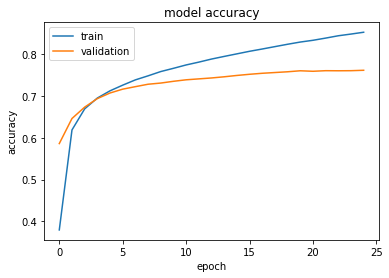

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

n_epochs = 15

history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/15
704/704 [==============================] - 480s 636ms/step - loss: 1.5344 - accuracy: 0.6186 - val_loss: 1.0428 - val_accuracy: 0.7238
Epoch 2/15
704/704 [==============================] - 452s 641ms/step - loss: 0.8095 - accuracy: 0.7755 - val_loss: 0.8417 - val_accuracy: 0.7644
Epoch 3/15
704/704 [==============================] - 452s 641ms/step - loss: 0.6073 - accuracy: 0.8326 - val_loss: 0.7594 - val_accuracy: 0.7838
Epoch 4/15
704/704 [==============================] - 443s 629ms/step - loss: 0.4800 - accuracy: 0.8723 - val_loss: 0.7139 - val_accuracy: 0.7938
Epoch 5/15
704/704 [==============================] - 443s 630ms/step - loss: 0.3845 - accuracy: 0.9030 - val_loss: 0.6865 - val_accuracy: 0.8000
Epoch 6/15
704/704 [==============================] - 444s 631ms/step - loss: 0.3085 - accuracy: 0.9282 - val_loss: 0.6682 - val_accuracy: 0.8058
Epoch 7/15
704/704 [==============================] - 444s 630ms/step - loss: 0.2462 - accuracy: 0.9479 - val_loss: 0.6570 -

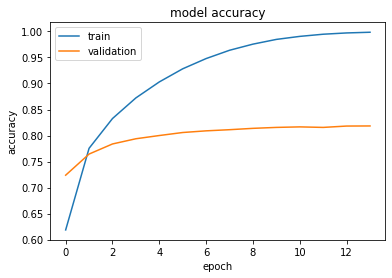

In [ ]:
plot_train_hist(history_2)

In [ ]:
# save model after training
# model.save('drive/MyDrive/Models/my_model') 

In [ ]:
# evaluate test set 
# evalutes fine labels (subclasses) 
model.evaluate(ds_test)

157/157 [==============================] - 26s 162ms/step - loss: 0.6995 - accuracy: 0.8145


[0.6995290517807007, 0.8144999742507935]

In [ ]:
# loads saved model
model = tf.keras.models.load_model('drive/MyDrive/Models/my_model')

*Coarse Training*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, no_features=True)

In [ ]:
# coarse labels training accuracy = 99%
# predicts coarse accuray by mapping the fine labels
# of the predictions and targets to their coarse label
# and checking if they match
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.9943555555555555


*Coarse Validation*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.9032


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# coarse labels test accuracy = 90%
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.9007


*Misclassified Images*

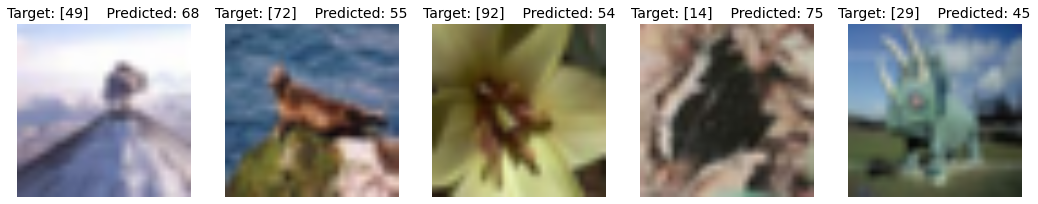

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(18, 10))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {target_fine_label[misclassifiedIndexes[index]]}    Predicted: {pred[misclassifiedIndexes[index]]}', fontsize=14)

plt.show()


In [ ]:
# classify sub classes into super class
pred_coarse = convert_label(pred, fine_id_coarse_id_map)
label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

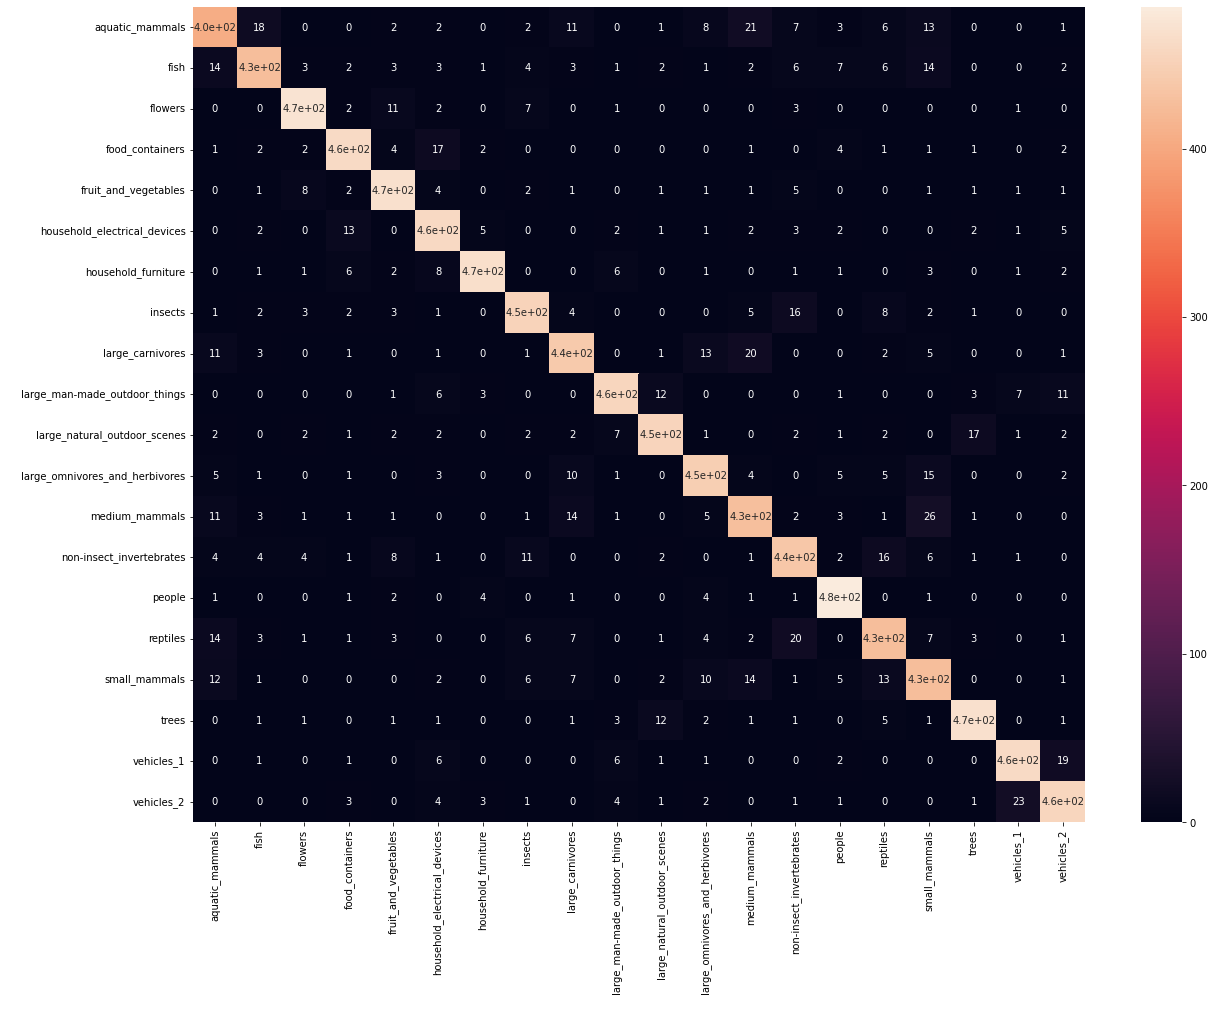

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(label_coarse, pred_coarse)
cm_df = pd.DataFrame(cm, index=coarse_labels, columns=coarse_labels)
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

#### *Trained on Coarse Labels*

In [ ]:
x_train_ctr, x_train_cv, y_train_ctr, y_train_cv = train_test_split(x_train_coarse_full,
                                                                y_train_coarse_full,
                                                                test_size=5000, random_state=22)

In [ ]:
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_ctr, y_train_ctr), (x_train_cv, y_train_cv), (x_test_coarse_full, y_test_coarse_full) )

In [ ]:
np.unique(y_test_coarse_full)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(20, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

52617216/52606240 [==============================] - 0s 0us/step


In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 22 ms, sys: 0 ns, total: 22 ms
Wall time: 21.2 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
704/704 [==============================] - 92s 104ms/step - loss: 1.5353 - accuracy: 0.6601 - val_loss: 0.8725 - val_accuracy: 0.7800
Epoch 2/25
704/704 [==============================] - 71s 101ms/step - loss: 0.7494 - accuracy: 0.7946 - val_loss: 0.6773 - val_accuracy: 0.8074
Epoch 3/25
704/704 [==============================] - 71s 100ms/step - loss: 0.6223 - accuracy: 0.8178 - val_loss: 0.6108 - val_accuracy: 0.8180
Epoch 4/25
704/704 [==============================] - 71s 100ms/step - loss: 0.5602 - accuracy: 0.8317 - val_loss: 0.5764 - val_accuracy: 0.8260
Epoch 5/25
704/704 [==============================] - 71s 100ms/step - loss: 0.5193 - accuracy: 0.8419 - val_loss: 0.5552 - val_accuracy: 0.8314
Epoch 6/25
704/704 [==============================] - 71s 101ms/step - loss: 0.4880 - accuracy: 0.8507 - val_loss: 0.5408 - val_accuracy: 0.8346
Epoch 7/25
704/704 [==============================] - 71s 100ms/step - loss: 0.4621 - accuracy: 0.8579 - val_loss: 0.5301 - val_ac

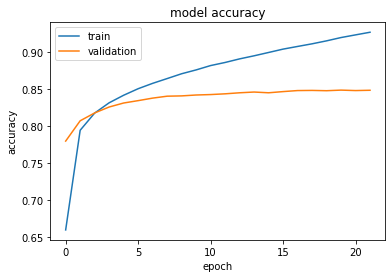

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

n_epochs = 15

history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/15
704/704 [==============================] - 295s 374ms/step - loss: 1.0650 - accuracy: 0.6865 - val_loss: 0.6994 - val_accuracy: 0.7942
Epoch 2/15
704/704 [==============================] - 260s 369ms/step - loss: 0.4861 - accuracy: 0.8513 - val_loss: 0.5472 - val_accuracy: 0.8334
Epoch 3/15
704/704 [==============================] - 260s 369ms/step - loss: 0.3144 - accuracy: 0.9091 - val_loss: 0.4883 - val_accuracy: 0.8536
Epoch 4/15
704/704 [==============================] - 260s 369ms/step - loss: 0.2106 - accuracy: 0.9456 - val_loss: 0.4595 - val_accuracy: 0.8634
Epoch 5/15
704/704 [==============================] - 260s 369ms/step - loss: 0.1394 - accuracy: 0.9700 - val_loss: 0.4456 - val_accuracy: 0.8680
Epoch 6/15
704/704 [==============================] - 260s 370ms/step - loss: 0.0895 - accuracy: 0.9852 - val_loss: 0.4391 - val_accuracy: 0.8708
Epoch 7/15
704/704 [==============================] - 260s 369ms/step - loss: 0.0558 - accuracy: 0.9933 - val_loss: 0.4373 -

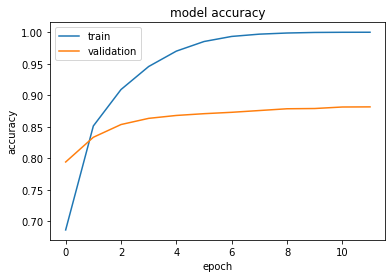

In [ ]:
plot_train_hist(history_2)

In [ ]:
model.evaluate(ds_test)

157/157 [==============================] - 14s 90ms/step - loss: 0.4654 - accuracy: 0.8832


[0.46536508202552795, 0.8831999897956848]

In [ ]:
test_images, target_coarse_label, pred = get_predictions(ds_test)

In [ ]:
np.unique(target_coarse_label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

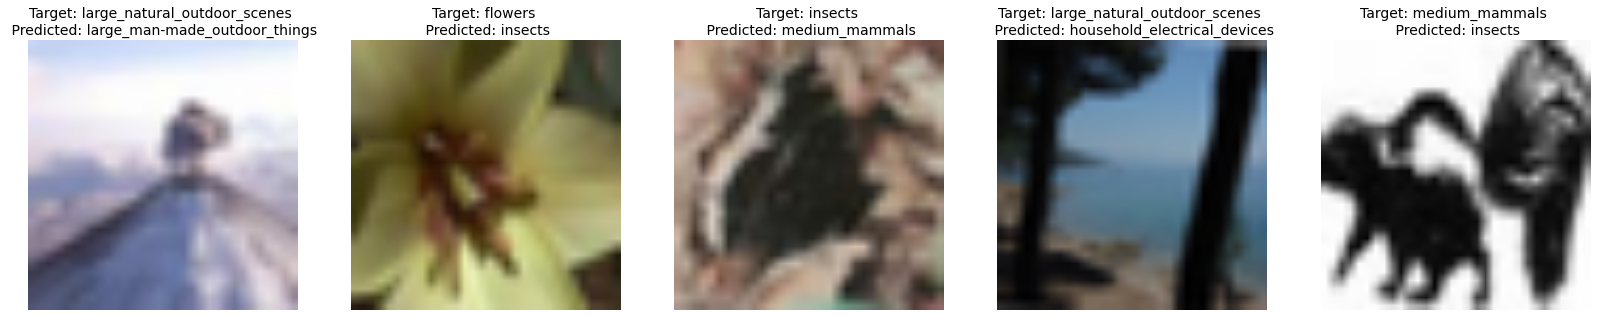

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_coarse_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(28, 23))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {coarse_labels[target_coarse_label[misclassifiedIndexes[index]][0] ]} \n Predicted: { coarse_labels[pred[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()


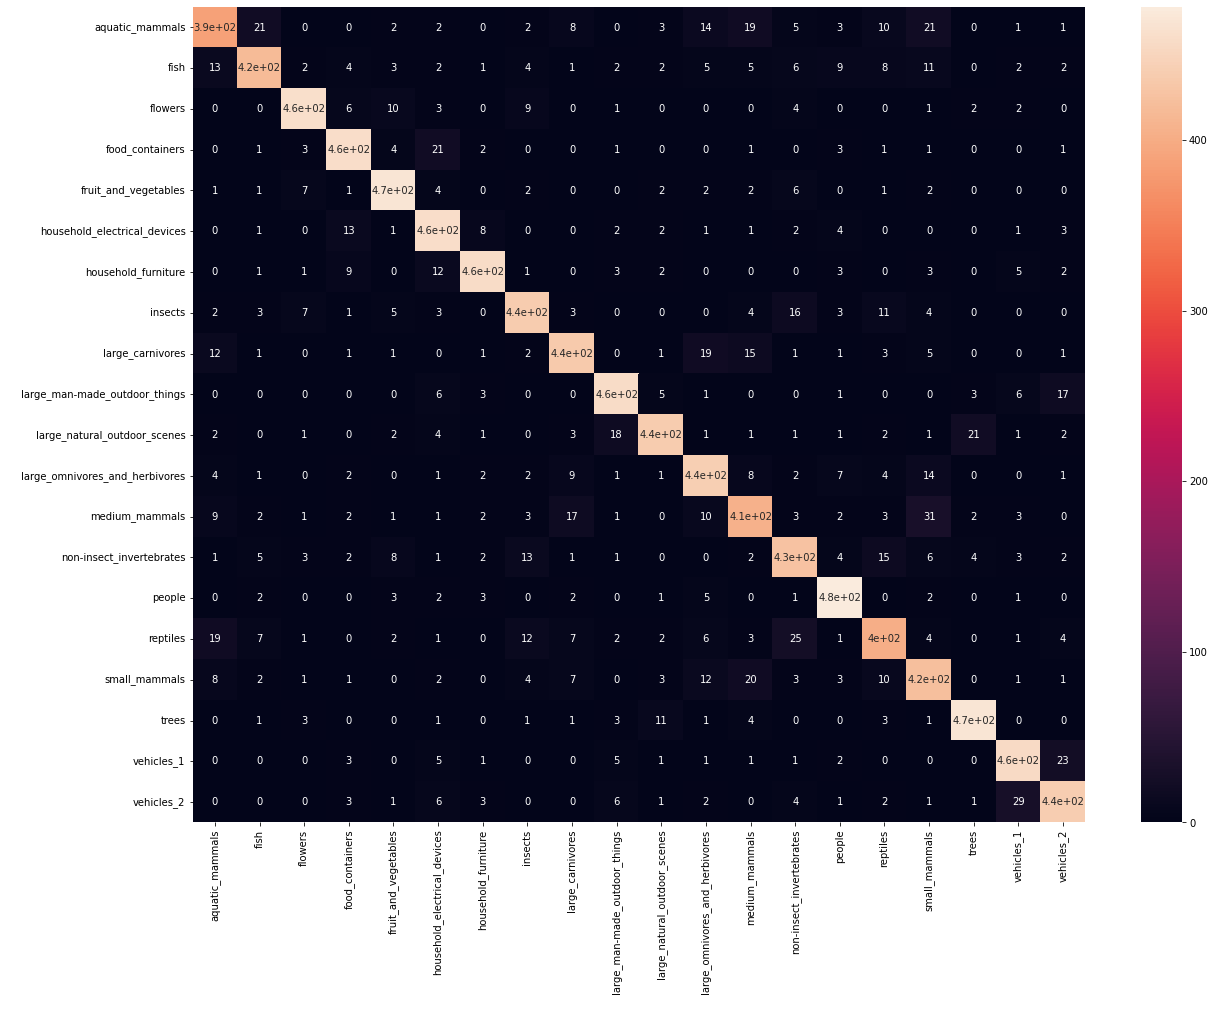

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(target_coarse_label, pred)
cm_df = pd.DataFrame(cm, index=coarse_labels, columns=coarse_labels)
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

##Question 2: Performance on 20-class subset of CIFAR-100


### Part 2A: Performance on "different" classes
Choose the 20 class subset such that there is one class from each of the 20 superclasses. Re-train a transfer learning model, similar to what you did in Part 1. 

How much data do you need to achieve similar accuracy as you achieved in Part 1? (ie how many images from each class is needed?)

What is your accuracy, for coarse and fine labels for both training and testing, if you utilize all available training data (ie 500 images per class)?

Plot several misclassified images. Plot confusion matrices for both coarse and fine labels.


#### *Data*

In [ ]:
#subset class contains 1 class per super class 
# sorted according to super class 
chosen_classes = [55, 91, 70, 9, 51, 86, 20, 7, 88, 12, 60, 19, 63, 77,2,93, 74, 96, 8, 69]

In [ ]:
string_names = get_string_value(chosen_classes)

In [ ]:
string_names

['otter',
 'trout',
 'rose',
 'bottle',
 'mushroom',
 'telephone',
 'chair',
 'beetle',
 'tiger',
 'bridge',
 'plain',
 'cattle',
 'porcupine',
 'snail',
 'baby',
 'turtle',
 'shrew',
 'willow_tree',
 'bicycle',
 'rocket']

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_label[i] = elem

In [ ]:
print(fine_to_index, "\n",index_to_label )

{55: 0, 91: 1, 70: 2, 9: 3, 51: 4, 86: 5, 20: 6, 7: 7, 88: 8, 12: 9, 60: 10, 19: 11, 63: 12, 77: 13, 2: 14, 93: 15, 74: 16, 96: 17, 8: 18, 69: 19} 
 {0: 55, 1: 91, 2: 70, 3: 9, 4: 51, 5: 86, 6: 20, 7: 7, 8: 88, 9: 12, 10: 60, 11: 19, 12: 63, 13: 77, 14: 2, 15: 93, 16: 74, 17: 96, 18: 8, 19: 69}


#### *Training*

###### *Trained  100% train and test set for selected fine classes*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)

In [ ]:
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test) )

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(20, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 27.1 ms, sys: 1.85 ms, total: 29 ms
Wall time: 28.1 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
141/141 [==============================] - 28s 123ms/step - loss: 2.4389 - accuracy: 0.5096 - val_loss: 1.6743 - val_accuracy: 0.7960
Epoch 2/25
141/141 [==============================] - 15s 106ms/step - loss: 1.2062 - accuracy: 0.8514 - val_loss: 0.9173 - val_accuracy: 0.8630
Epoch 3/25
141/141 [==============================] - 15s 109ms/step - loss: 0.7463 - accuracy: 0.8808 - val_loss: 0.6724 - val_accuracy: 0.8820
Epoch 4/25
141/141 [==============================] - 15s 108ms/step - loss: 0.5668 - accuracy: 0.8944 - val_loss: 0.5587 - val_accuracy: 0.8890
Epoch 5/25
141/141 [==============================] - 15s 105ms/step - loss: 0.4700 - accuracy: 0.9058 - val_loss: 0.4930 - val_accuracy: 0.8920
Epoch 6/25
141/141 [==============================] - 15s 105ms/step - loss: 0.4073 - accuracy: 0.9136 - val_loss: 0.4499 - val_accuracy: 0.8940
Epoch 7/25
141/141 [==============================] - 15s 106ms/step - loss: 0.3617 - accuracy: 0.9220 - val_loss: 0.4193 - val_ac

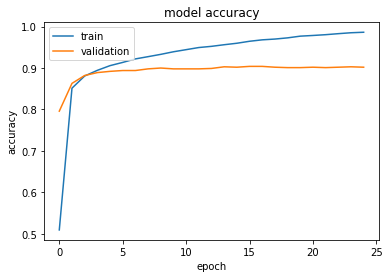

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/15
141/141 [==============================] - 98s 399ms/step - loss: 1.1298 - accuracy: 0.7083 - val_loss: 0.8525 - val_accuracy: 0.7890
Epoch 2/15
141/141 [==============================] - 53s 379ms/step - loss: 0.5457 - accuracy: 0.8718 - val_loss: 0.6082 - val_accuracy: 0.8320
Epoch 3/15
141/141 [==============================] - 53s 379ms/step - loss: 0.3289 - accuracy: 0.9299 - val_loss: 0.5074 - val_accuracy: 0.8590
Epoch 4/15
141/141 [==============================] - 53s 379ms/step - loss: 0.2163 - accuracy: 0.9603 - val_loss: 0.4533 - val_accuracy: 0.8780
Epoch 5/15
141/141 [==============================] - 53s 379ms/step - loss: 0.1481 - accuracy: 0.9783 - val_loss: 0.4197 - val_accuracy: 0.8820
Epoch 6/15
141/141 [==============================] - 53s 378ms/step - loss: 0.1041 - accuracy: 0.9881 - val_loss: 0.3969 - val_accuracy: 0.8850
Epoch 7/15
141/141 [==============================] - 53s 379ms/step - loss: 0.0755 - accuracy: 0.9931 - val_loss: 0.3805 - val_ac

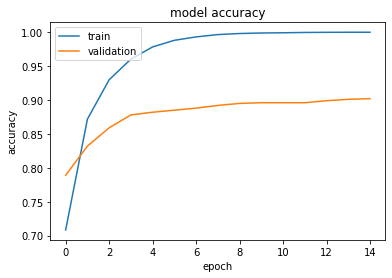

In [ ]:
plot_train_hist(history_2)

In [ ]:
# save model after training
model.save('drive/MyDrive/Models/my_model_1') 

In [ ]:
# evaluate test set 
# evalutes fine labels (subclasses) 
model.evaluate(ds_test)

32/32 [==============================] - 3s 91ms/step - loss: 0.3333 - accuracy: 0.9135


[0.3332552909851074, 0.9135000109672546]

In [ ]:
# loads saved model
#model = tf.keras.models.load_model('drive/MyDrive/Models/my_model_1')

*Coarse training*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.9973333333333333


*Coarse test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.9135


*Misclassified Images*

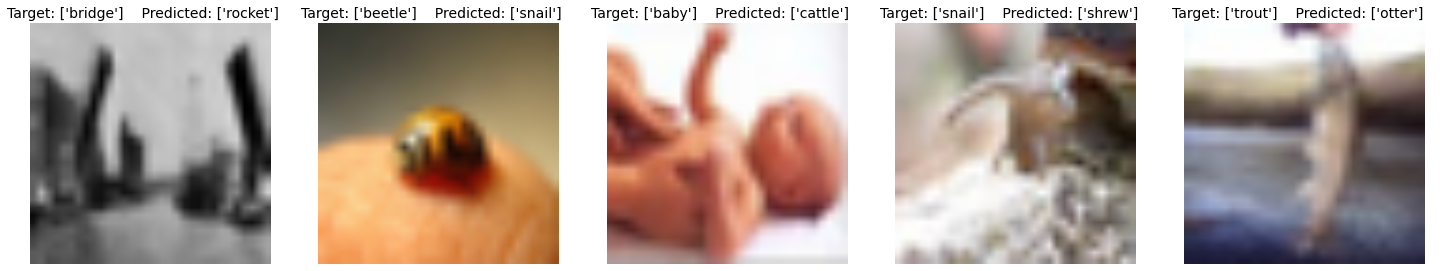

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 20))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

In [ ]:
# classify sub classes into super class
pred_coarse = convert_label(pred, fine_id_coarse_id_map)
label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

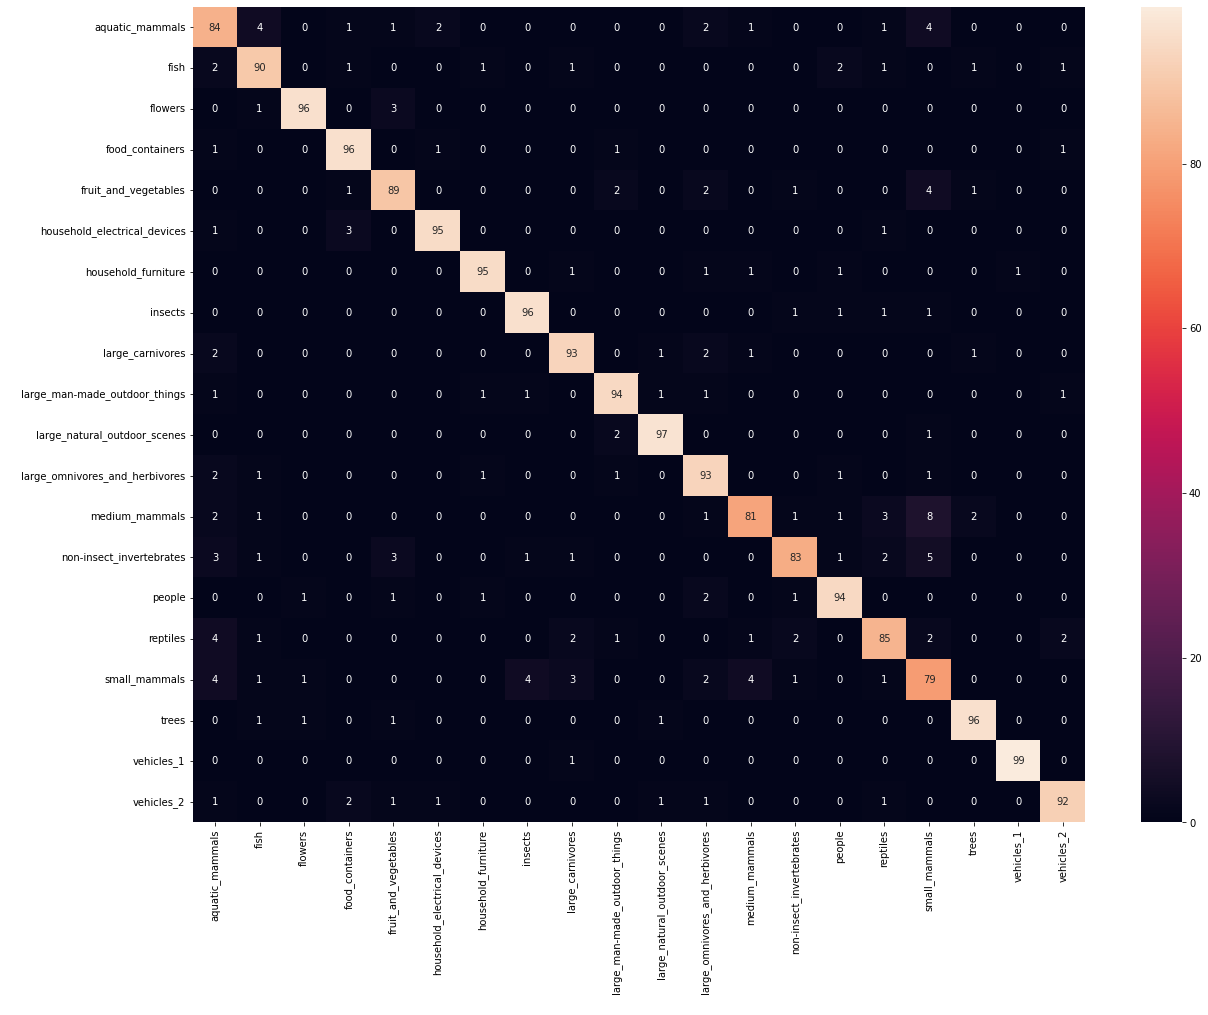

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(label_coarse, pred_coarse)
cm_df = pd.DataFrame(cm, index=coarse_labels, columns=coarse_labels)
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

###### *Trained 50% train and test set for selected fine classes(250 train, 50 test)*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 250)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 50)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(20, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 23.5 ms, sys: 881 µs, total: 24.4 ms
Wall time: 23.4 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
71/71 [==============================] - 24s 149ms/step - loss: 2.8160 - accuracy: 0.2544 - val_loss: 2.4373 - val_accuracy: 0.6540
Epoch 2/25
71/71 [==============================] - 8s 112ms/step - loss: 2.0299 - accuracy: 0.7780 - val_loss: 1.6652 - val_accuracy: 0.8040
Epoch 3/25
71/71 [==============================] - 7s 104ms/step - loss: 1.3631 - accuracy: 0.8471 - val_loss: 1.1685 - val_accuracy: 0.8460
Epoch 4/25
71/71 [==============================] - 7s 104ms/step - loss: 0.9848 - accuracy: 0.8747 - val_loss: 0.9056 - val_accuracy: 0.8620
Epoch 5/25
71/71 [==============================] - 7s 104ms/step - loss: 0.7769 - accuracy: 0.8884 - val_loss: 0.7535 - val_accuracy: 0.8800
Epoch 6/25
71/71 [==============================] - 7s 104ms/step - loss: 0.6490 - accuracy: 0.9007 - val_loss: 0.6557 - val_accuracy: 0.8840
Epoch 7/25
71/71 [==============================] - 7s 104ms/step - loss: 0.5613 - accuracy: 0.9064 - val_loss: 0.5881 - val_accuracy: 0.8820
Epoch

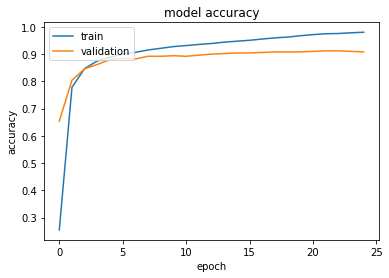

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
71/71 [==============================] - 70s 420ms/step - loss: 1.4402 - accuracy: 0.6640 - val_loss: 1.1919 - val_accuracy: 0.7580
Epoch 2/15
71/71 [==============================] - 27s 376ms/step - loss: 0.8788 - accuracy: 0.8251 - val_loss: 0.9156 - val_accuracy: 0.8060
Epoch 3/15
71/71 [==============================] - 27s 378ms/step - loss: 0.5806 - accuracy: 0.8958 - val_loss: 0.7404 - val_accuracy: 0.8420
Epoch 4/15
71/71 [==============================] - 27s 379ms/step - loss: 0.4088 - accuracy: 0.9340 - val_loss: 0.6367 - val_accuracy: 0.8560
Epoch 5/15
71/71 [==============================] - 27s 377ms/step - loss: 0.3003 - accuracy: 0.9578 - val_loss: 0.5680 - val_accuracy: 0.8640
Epoch 6/15
71/71 [==============================] - 27s 377ms/step - loss: 0.2270 - accuracy: 0.9733 - val_loss: 0.5191 - val_accuracy: 0.8720
Epoch 7/15
71/71 [==============================] - 27s 377ms/step - loss: 0.1745 - accuracy: 0.9840 - val_loss: 0.4823 - val_accuracy: 0.8860

In [ ]:
# save model after training
model.save('sample_data/my_model_2a1') 

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

16/16 [==============================] - 1s 90ms/step - loss: 0.4312 - accuracy: 0.8920


[0.4312279522418976, 0.8920000195503235]

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)


In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.998


In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)


In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_coarse)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.892


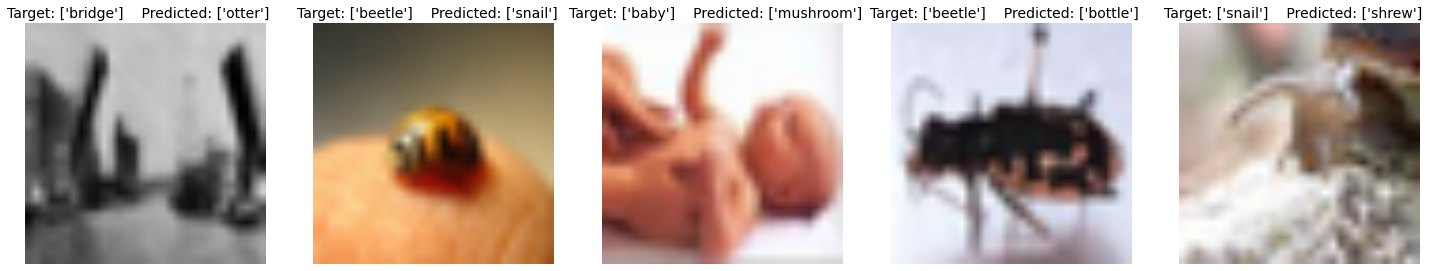

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 20))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

In [ ]:
# classify sub classes into super class
pred_coarse = convert_label(pred, fine_id_coarse_id_map)
label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

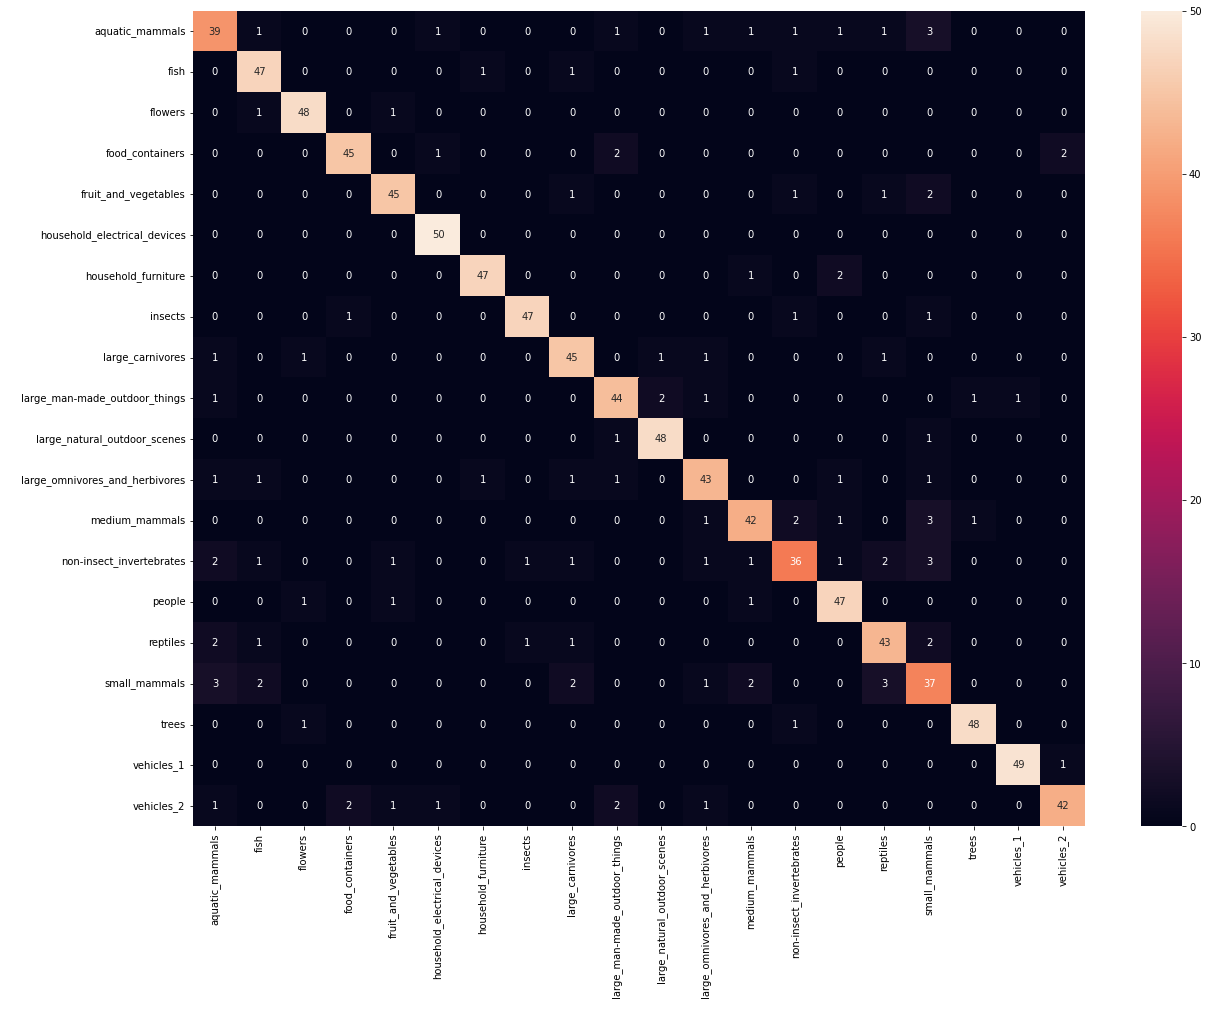

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(label_coarse, pred_coarse)
cm_df = pd.DataFrame(cm, index=coarse_labels, columns=coarse_labels)
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

###### *Trained 20% train and test set for selected fine classes(100 train, 20 test)*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 100)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 20)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(20, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

52617216/52606240 [==============================] - 0s 0us/step


In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 29.2 ms, sys: 0 ns, total: 29.2 ms
Wall time: 28.3 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
29/29 [==============================] - 29s 216ms/step - loss: 3.0286 - accuracy: 0.0589 - val_loss: 2.8993 - val_accuracy: 0.1350
Epoch 2/25
29/29 [==============================] - 3s 104ms/step - loss: 2.7238 - accuracy: 0.3111 - val_loss: 2.5989 - val_accuracy: 0.4750
Epoch 3/25
29/29 [==============================] - 3s 104ms/step - loss: 2.4035 - accuracy: 0.6744 - val_loss: 2.2770 - val_accuracy: 0.7200
Epoch 4/25
29/29 [==============================] - 3s 104ms/step - loss: 2.0648 - accuracy: 0.8094 - val_loss: 1.9551 - val_accuracy: 0.7900
Epoch 5/25
29/29 [==============================] - 3s 104ms/step - loss: 1.7400 - accuracy: 0.8450 - val_loss: 1.6672 - val_accuracy: 0.7900
Epoch 6/25
29/29 [==============================] - 3s 105ms/step - loss: 1.4614 - accuracy: 0.8639 - val_loss: 1.4327 - val_accuracy: 0.8250
Epoch 7/25
29/29 [==============================] - 3s 104ms/step - loss: 1.2398 - accuracy: 0.8750 - val_loss: 1.2517 - val_accuracy: 0.8400
Epoch

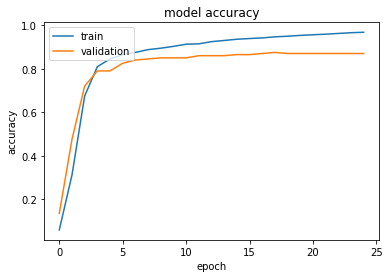

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
29/29 [==============================] - 55s 473ms/step - loss: 1.8495 - accuracy: 0.6400 - val_loss: 1.4819 - val_accuracy: 0.6600
Epoch 2/15
29/29 [==============================] - 11s 371ms/step - loss: 1.4990 - accuracy: 0.7650 - val_loss: 1.6401 - val_accuracy: 0.6900
Epoch 3/15
29/29 [==============================] - 11s 372ms/step - loss: 1.2126 - accuracy: 0.8344 - val_loss: 1.5793 - val_accuracy: 0.6900
Epoch 4/15
29/29 [==============================] - 11s 373ms/step - loss: 0.9851 - accuracy: 0.8822 - val_loss: 1.4341 - val_accuracy: 0.7200
Epoch 5/15
29/29 [==============================] - 11s 373ms/step - loss: 0.8057 - accuracy: 0.9133 - val_loss: 1.3087 - val_accuracy: 0.7700
Epoch 6/15
29/29 [==============================] - 11s 373ms/step - loss: 0.6674 - accuracy: 0.9394 - val_loss: 1.2044 - val_accuracy: 0.7900
Epoch 7/15
29/29 [==============================] - 11s 374ms/step - loss: 0.5570 - accuracy: 0.9539 - val_loss: 1.1180 - val_accuracy: 0.8100

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

7/7 [==============================] - 1s 110ms/step - loss: 0.6770 - accuracy: 0.8550


[0.677005410194397, 0.8550000190734863]

*Coarse Train*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)


In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.995


*Coarse valid*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.855


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.855


*Missclassified Images*

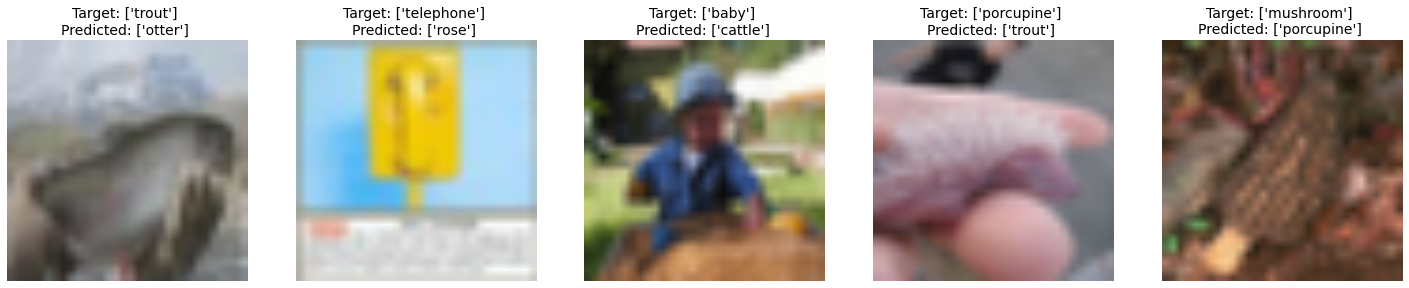

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 22))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]} \n  Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

In [ ]:
# classify sub classes into super class
pred_coarse = convert_label(pred, fine_id_coarse_id_map)
label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

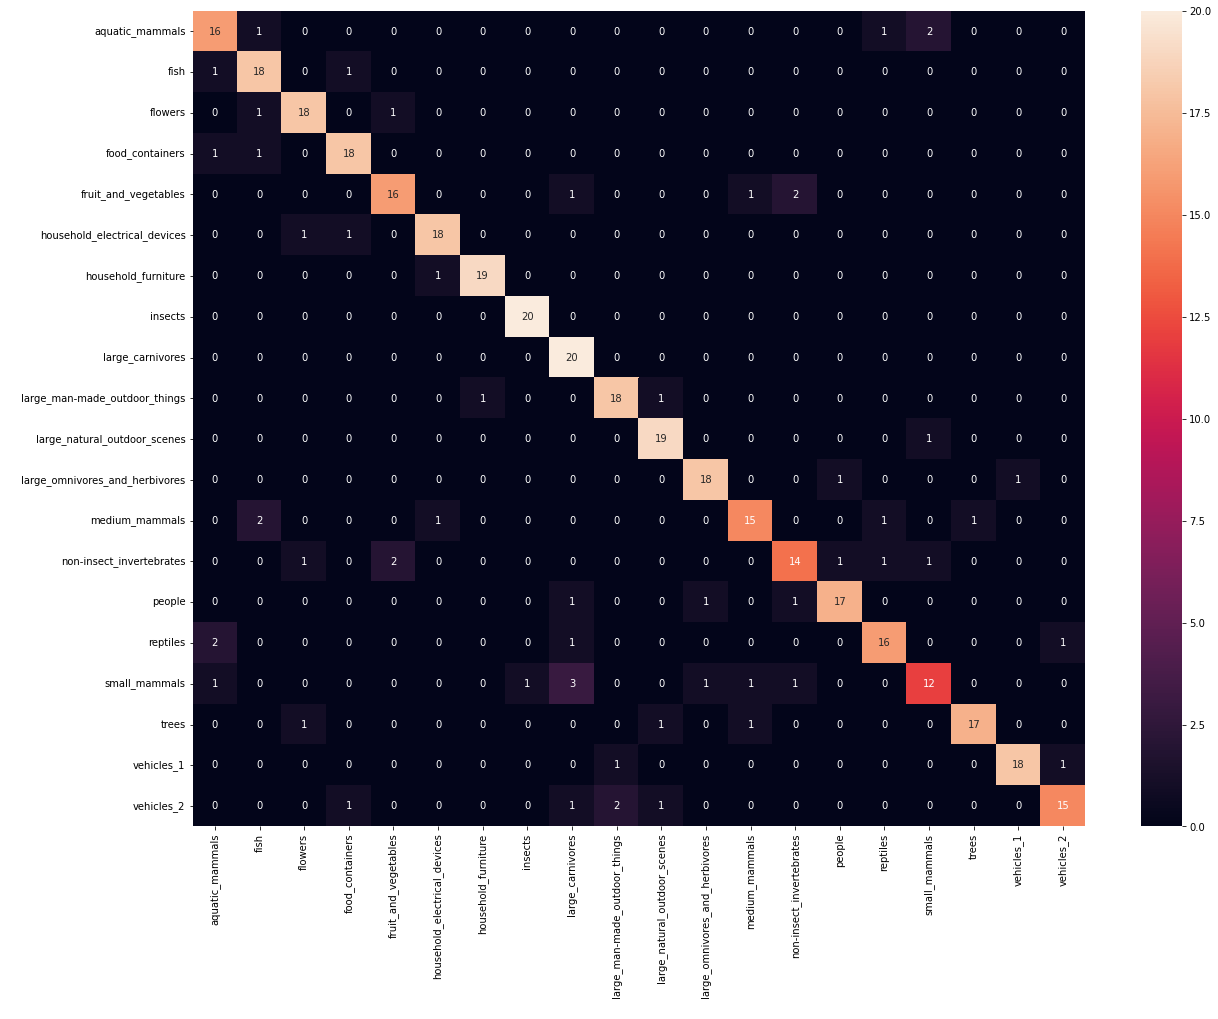

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(label_coarse, pred_coarse)
cm_df = pd.DataFrame(cm, index=coarse_labels, columns=coarse_labels)
plt.figure(figsize=(20,15))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

### Part 2B: Performance on "similar" classes
Choose your 20 classes such that they come from a minimum number of superclasses. Repeat your analysis from Part 2A:
1. Re-train a transfer learning model
2. Find how much data is needed to achieve similar accuracy as Part 1.
3. Find the maximum accuracy, utilizing all available training data.

Plot several misclassified images and confusion matrices.

Are your results different than they were for Part 2A?

#### *Data*
Chosen Fine Labels: ['beaver',
 'dolphin',
 'otter',
 'seal',
 'whale',
 'bear',
 'leopard',
 'lion',
 'tiger',
 'wolf',
 'fox',
 'porcupine',
 'possum',
 'raccoon',
 'skunk',
 'hamster',
 'mouse',
 'rabbit',
 'shrew',
 'squirrel'] </br>

Chosen Coarse Labels: ['aquatic_mammals', 'large_carnivores', 'medium_mammals', 'small_mammals']

In [ ]:
chosen_classes = [4, 30, 55, 72, 95, 3, 42, 43, 88, 97,34, 63, 64, 66, 75, 36, 50, 65, 74, 80 ]

In [ ]:
chosen_names = get_string_value(chosen_classes)
chosen_names

['beaver',
 'dolphin',
 'otter',
 'seal',
 'whale',
 'bear',
 'leopard',
 'lion',
 'tiger',
 'wolf',
 'fox',
 'porcupine',
 'possum',
 'raccoon',
 'skunk',
 'hamster',
 'mouse',
 'rabbit',
 'shrew',
 'squirrel']

In [ ]:
chosen_coarses = np.unique(convert_label(chosen_classes, fine_id_coarse_id_map))

In [ ]:
chosen_coarses_names = get_string_value(chosen_coarses, "coarse")

In [ ]:
chosen_coarses_names

['aquatic_mammals', 'large_carnivores', 'medium_mammals', 'small_mammals']

#### *Training*

###### *Trained  100% train and test set for selected fine classes*

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_label[i] = elem

In [ ]:
print(fine_to_index, "\n",index_to_coarse )

{4: 0, 30: 1, 55: 2, 72: 3, 95: 4, 3: 5, 42: 6, 43: 7, 88: 8, 97: 9, 34: 10, 63: 11, 64: 12, 66: 13, 75: 14, 36: 15, 50: 16, 65: 17, 74: 18, 80: 19} 
 {}


In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(20, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 24.1 ms, sys: 1.99 ms, total: 26.1 ms
Wall time: 25 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
141/141 [==============================] - 29s 123ms/step - loss: 2.6331 - accuracy: 0.3441 - val_loss: 2.0831 - val_accuracy: 0.5790
Epoch 2/25
141/141 [==============================] - 15s 104ms/step - loss: 1.7183 - accuracy: 0.6407 - val_loss: 1.5028 - val_accuracy: 0.6420
Epoch 3/25
141/141 [==============================] - 15s 103ms/step - loss: 1.3152 - accuracy: 0.6949 - val_loss: 1.2581 - val_accuracy: 0.6770
Epoch 4/25
141/141 [==============================] - 15s 104ms/step - loss: 1.1208 - accuracy: 0.7248 - val_loss: 1.1292 - val_accuracy: 0.6990
Epoch 5/25
141/141 [==============================] - 15s 104ms/step - loss: 1.0038 - accuracy: 0.7427 - val_loss: 1.0497 - val_accuracy: 0.7020
Epoch 6/25
141/141 [==============================] - 15s 104ms/step - loss: 0.9229 - accuracy: 0.7559 - val_loss: 0.9956 - val_accuracy: 0.7070
Epoch 7/25
141/141 [==============================] - 15s 103ms/step - loss: 0.8610 - accuracy: 0.7690 - val_loss: 0.9564 - val_ac

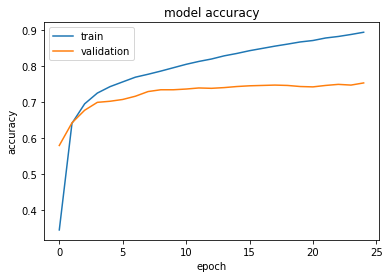

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
141/141 [==============================] - 96s 401ms/step - loss: 1.8180 - accuracy: 0.4701 - val_loss: 1.5653 - val_accuracy: 0.5360
Epoch 2/15
141/141 [==============================] - 53s 378ms/step - loss: 1.2046 - accuracy: 0.6633 - val_loss: 1.2770 - val_accuracy: 0.6230
Epoch 3/15
141/141 [==============================] - 53s 378ms/step - loss: 0.8976 - accuracy: 0.7557 - val_loss: 1.1215 - val_accuracy: 0.6610
Epoch 4/15
141/141 [==============================] - 53s 378ms/step - loss: 0.6994 - accuracy: 0.8181 - val_loss: 1.0268 - val_accuracy: 0.6810
Epoch 5/15
141/141 [==============================] - 53s 377ms/step - loss: 0.5551 - accuracy: 0.8662 - val_loss: 0.9636 - val_accuracy: 0.7020
Epoch 6/15
141/141 [==============================] - 53s 378ms/step - loss: 0.4430 - accuracy: 0.9053 - val_loss: 0.9200 - val_accuracy: 0.7170
Epoch 7/15
141/141 [==============================] - 53s 378ms/step - loss: 0.3551 - accuracy: 0.9334 - val_loss: 0.8890 - val_ac

In [ ]:
# save model after training
# model.save('sample_data/my_model_2b1') 

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

32/32 [==============================] - 3s 90ms/step - loss: 0.8757 - accuracy: 0.7355


[0.8756656050682068, 0.7354999780654907]

In [ ]:
# loads saved model
#model = tf.keras.models.load_model('sample_data/my_model_2b1')

*Coarse Training*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.9966666666666667


*Coarse validation*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.846


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.846


*Misclassfied images*

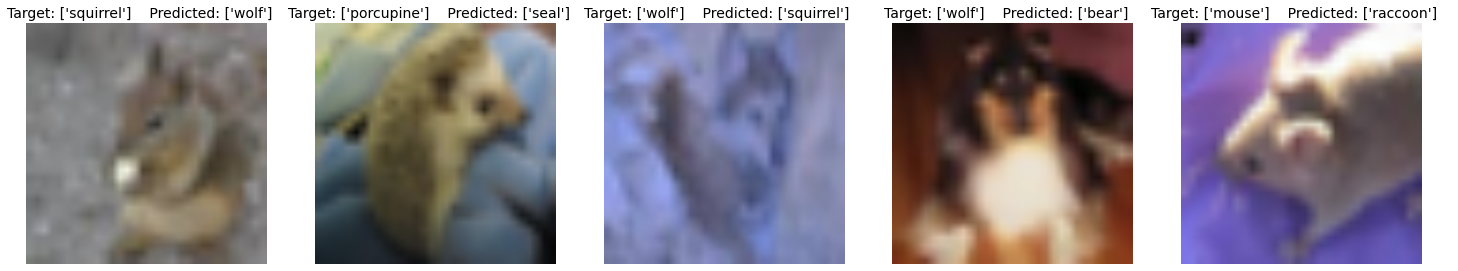

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 20))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

In [ ]:
# classify sub classes into super class
pred_coarse = convert_label(pred, fine_id_coarse_id_map)
label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

In [ ]:
chosen_coarse_labels = np.unique(pred_coarse)

In [ ]:
chosen_coarse_labels = get_string_value(chosen_coarse_labels, label="coarse")

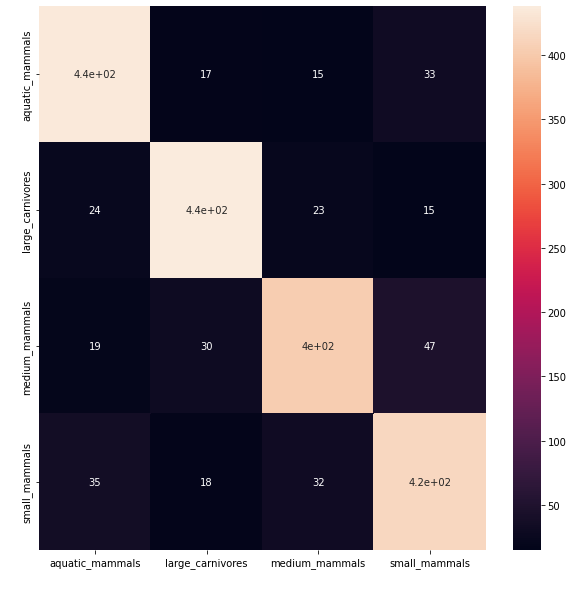

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(label_coarse, pred_coarse)
cm_df = pd.DataFrame(cm, index=chosen_coarse_labels, columns=chosen_coarse_labels)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

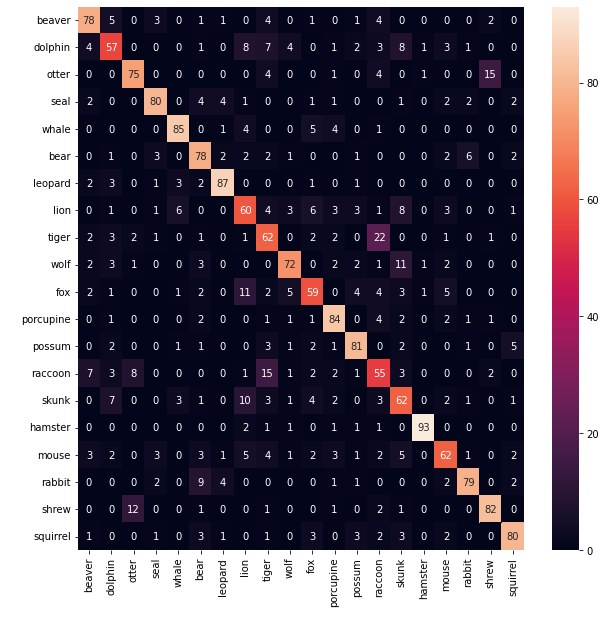

In [ ]:
#confusion matrix of fine labels (sub class)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=chosen_names, columns=chosen_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

###### *Trained 100% train and test set for super classes*

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_coarses):
  fine_to_index[elem] = i
  index_to_label[i] = elem


In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_ctr, y_train_ctr = filter_classes(chosen_coarses, x_train_coarse_full,
                                                                y_train_coarse_full, 500)

In [ ]:
np.unique(y_train_ctr, return_counts=True)

(array([ 0,  8, 12, 16]), array([500, 500, 500, 500]))

In [ ]:
x_test, y_test = filter_classes(chosen_coarses, x_test_coarse_full, y_test_coarse_full, 100)

In [ ]:
# encode class labels 
y_train_ctr = np.array(convert_label(y_train_ctr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_ctr, x_train_cv, y_train_ctr, y_train_cv = train_test_split(x_train_ctr,
                                                                y_train_ctr,
                                                                test_size=0.1, random_state=22)

In [ ]:
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_ctr, y_train_ctr), (x_train_cv, y_train_cv), (x_test, y_test) )

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(4, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 24.4 ms, sys: 985 µs, total: 25.3 ms
Wall time: 24.8 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
29/29 [==============================] - 16s 197ms/step - loss: 1.3976 - accuracy: 0.2872 - val_loss: 1.2592 - val_accuracy: 0.5000
Epoch 2/25
29/29 [==============================] - 3s 103ms/step - loss: 1.1082 - accuracy: 0.6633 - val_loss: 1.0144 - val_accuracy: 0.7100
Epoch 3/25
29/29 [==============================] - 3s 103ms/step - loss: 0.8721 - accuracy: 0.7628 - val_loss: 0.8366 - val_accuracy: 0.7500
Epoch 4/25
29/29 [==============================] - 3s 103ms/step - loss: 0.7034 - accuracy: 0.7967 - val_loss: 0.7360 - val_accuracy: 0.7550
Epoch 5/25
29/29 [==============================] - 3s 103ms/step - loss: 0.5988 - accuracy: 0.8200 - val_loss: 0.6850 - val_accuracy: 0.7700
Epoch 6/25
29/29 [==============================] - 3s 103ms/step - loss: 0.5323 - accuracy: 0.8267 - val_loss: 0.6575 - val_accuracy: 0.7800
Epoch 7/25
29/29 [==============================] - 3s 103ms/step - loss: 0.4852 - accuracy: 0.8428 - val_loss: 0.6411 - val_accuracy: 0.7800
Epoch

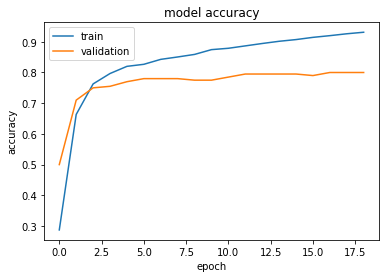

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

n_epochs = 15

history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/15
29/29 [==============================] - 53s 467ms/step - loss: 1.0519 - accuracy: 0.5667 - val_loss: 0.9789 - val_accuracy: 0.5600
Epoch 2/15
29/29 [==============================] - 11s 373ms/step - loss: 0.8623 - accuracy: 0.6850 - val_loss: 0.8789 - val_accuracy: 0.6450
Epoch 3/15
29/29 [==============================] - 11s 372ms/step - loss: 0.7142 - accuracy: 0.7783 - val_loss: 0.8846 - val_accuracy: 0.6200
Epoch 4/15
29/29 [==============================] - 11s 373ms/step - loss: 0.5923 - accuracy: 0.8411 - val_loss: 0.8504 - val_accuracy: 0.6450
Epoch 5/15
29/29 [==============================] - 11s 373ms/step - loss: 0.4911 - accuracy: 0.8900 - val_loss: 0.8217 - val_accuracy: 0.6550
Epoch 6/15
29/29 [==============================] - 11s 373ms/step - loss: 0.4068 - accuracy: 0.9244 - val_loss: 0.7997 - val_accuracy: 0.7000
Epoch 7/15
29/29 [==============================] - 11s 373ms/step - loss: 0.3364 - accuracy: 0.9489 - val_loss: 0.7828 - val_accuracy: 0.7150

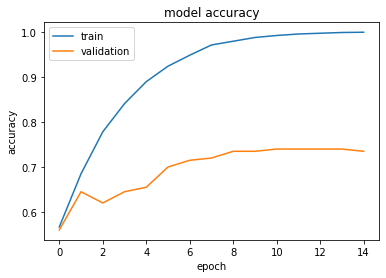

In [ ]:
plot_train_hist(history_2)

In [ ]:
model.evaluate(ds_test)

7/7 [==============================] - 1s 89ms/step - loss: 0.7706 - accuracy: 0.6975


[0.7706235647201538, 0.6974999904632568]

In [ ]:
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# decode labels
# encode class labels 
target_fine_label = np.array(convert_label(target_fine_label, index_to_label))
pred = np.array(convert_label(pred, index_to_label))

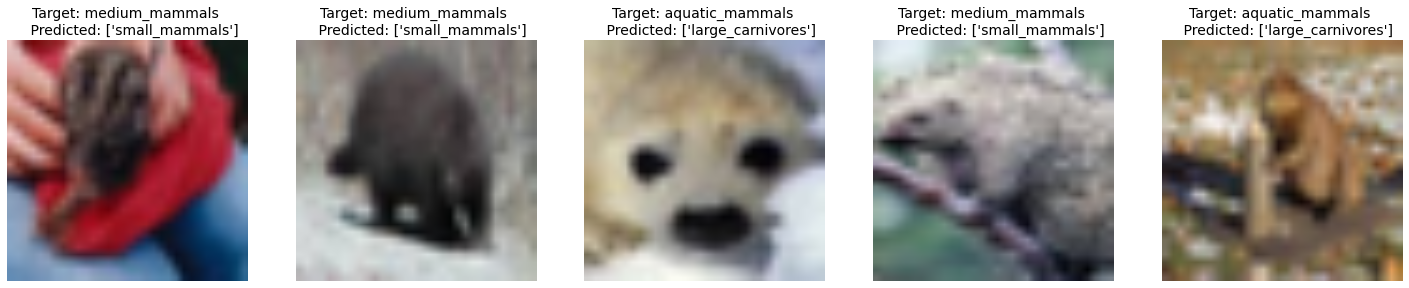

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 20))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {coarse_labels[target_fine_label[misclassifiedIndexes[index]][0]]} \n   Predicted: {coarse_labels[pred[misclassifiedIndexes[index]]]}', fontsize=14)

plt.show()


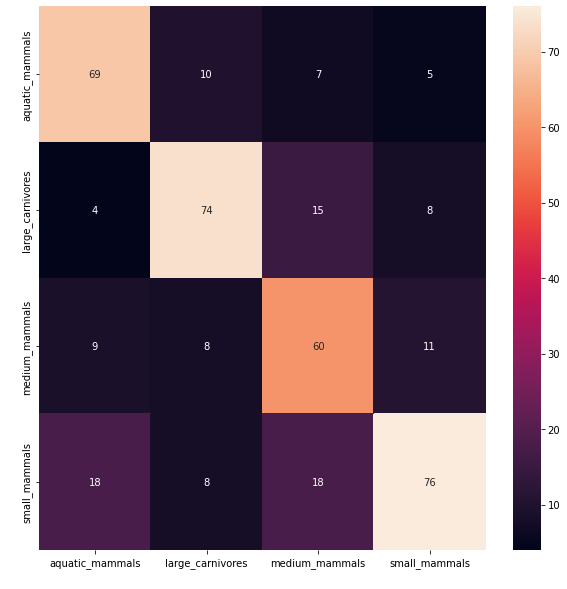

In [ ]:
#confusion matrix of coarse labels (super class)
cm = confusion_matrix(pred, target_fine_label)
cm_df = pd.DataFrame(cm, index=chosen_coarses_names, columns=chosen_coarses_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

## Question 3: Performance on 5-class subset of CIFAR-100


### Part 3A: Performance on "different" classes
Repeat your analysis from Part 2A, but for 5 classes chosen from 5 different superclasses.

Are your results different from Part 2A?

#### *Data*
The chosen fine labels : ['poppy', 'wardrobe', 'boy', 'willow_tree', 'bicycle'] </br>
The chosen coarse labels: ['Flowers, 'Furniture', 'People', 'Trees', 'Vechile_1']

In [ ]:
chosen_classes = [62, 94, 11, 96, 8]

In [ ]:
string_names = get_string_value(chosen_classes)
string_names

['poppy', 'wardrobe', 'boy', 'willow_tree', 'bicycle']

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_label[i] = elem

#### *Training*

##### *Training using all images*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(5, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 19.5 ms, sys: 25 µs, total: 19.6 ms
Wall time: 19.1 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
36/36 [==============================] - 14s 171ms/step - loss: 1.4391 - accuracy: 0.3916 - val_loss: 1.0180 - val_accuracy: 0.8960
Epoch 2/25
36/36 [==============================] - 4s 101ms/step - loss: 0.6959 - accuracy: 0.9609 - val_loss: 0.4649 - val_accuracy: 0.9680
Epoch 3/25
36/36 [==============================] - 4s 101ms/step - loss: 0.3288 - accuracy: 0.9787 - val_loss: 0.2591 - val_accuracy: 0.9760
Epoch 4/25
36/36 [==============================] - 4s 101ms/step - loss: 0.1958 - accuracy: 0.9818 - val_loss: 0.1802 - val_accuracy: 0.9760
Epoch 5/25
36/36 [==============================] - 4s 101ms/step - loss: 0.1379 - accuracy: 0.9840 - val_loss: 0.1424 - val_accuracy: 0.9760
Epoch 6/25
36/36 [==============================] - 4s 101ms/step - loss: 0.1064 - accuracy: 0.9862 - val_loss: 0.1210 - val_accuracy: 0.9760
Epoch 7/25
36/36 [==============================] - 4s 102ms/step - loss: 0.0860 - accuracy: 0.9880 - val_loss: 0.1074 - val_accuracy: 0.9800
Epoch

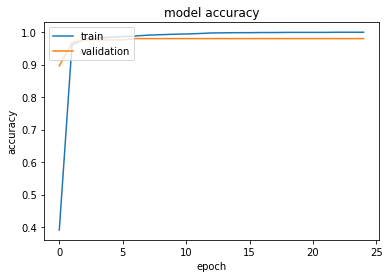

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
36/36 [==============================] - 49s 432ms/step - loss: 0.6447 - accuracy: 0.8404 - val_loss: 0.3793 - val_accuracy: 0.9080
Epoch 2/15
36/36 [==============================] - 13s 368ms/step - loss: 0.3624 - accuracy: 0.9516 - val_loss: 0.3420 - val_accuracy: 0.9400
Epoch 3/15
36/36 [==============================] - 13s 369ms/step - loss: 0.2208 - accuracy: 0.9800 - val_loss: 0.2687 - val_accuracy: 0.9600
Epoch 4/15
36/36 [==============================] - 13s 366ms/step - loss: 0.1451 - accuracy: 0.9884 - val_loss: 0.2196 - val_accuracy: 0.9640
Epoch 5/15
36/36 [==============================] - 13s 366ms/step - loss: 0.1008 - accuracy: 0.9933 - val_loss: 0.1867 - val_accuracy: 0.9680
Epoch 6/15
36/36 [==============================] - 13s 367ms/step - loss: 0.0735 - accuracy: 0.9978 - val_loss: 0.1634 - val_accuracy: 0.9760
Epoch 7/15
36/36 [==============================] - 13s 366ms/step - loss: 0.0557 - accuracy: 0.9987 - val_loss: 0.1462 - val_accuracy: 0.9800

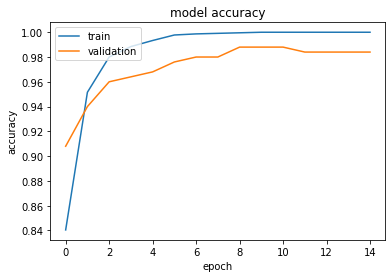

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

8/8 [==============================] - 1s 126ms/step - loss: 0.0931 - accuracy: 0.9780


[0.09305371344089508, 0.9779999852180481]

*Coarse Train*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.9995555555555555


*Coarse Valid*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.984


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.978


*Misclassified Images*

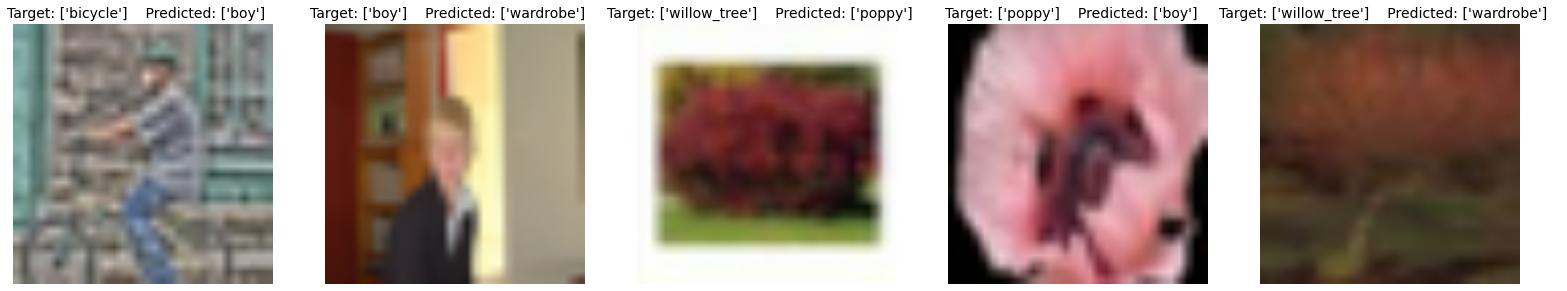

In [ ]:
# get misclassified images
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(27, 25))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

In [ ]:
# # classify sub classes into super class
# pred_coarse = convert_label(pred, fine_id_coarse_id_map)
# label_coarse = convert_label(target_fine_label, fine_id_coarse_id_map)

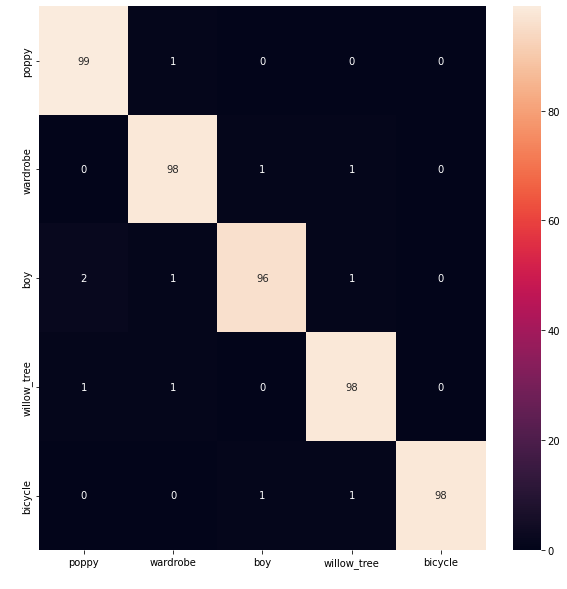

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

##### *Training using 20% images*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 100)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 20)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(5, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 18.3 ms, sys: 2.03 ms, total: 20.3 ms
Wall time: 20.3 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
8/8 [==============================] - 11s 454ms/step - loss: 1.7397 - accuracy: 0.2044 - val_loss: 1.6666 - val_accuracy: 0.1600
Epoch 2/25
8/8 [==============================] - 1s 97ms/step - loss: 1.5786 - accuracy: 0.2067 - val_loss: 1.5227 - val_accuracy: 0.2200
Epoch 3/25
8/8 [==============================] - 1s 97ms/step - loss: 1.4239 - accuracy: 0.3978 - val_loss: 1.3811 - val_accuracy: 0.5200
Epoch 4/25
8/8 [==============================] - 1s 96ms/step - loss: 1.2697 - accuracy: 0.7111 - val_loss: 1.2436 - val_accuracy: 0.6800
Epoch 5/25
8/8 [==============================] - 1s 97ms/step - loss: 1.1171 - accuracy: 0.7822 - val_loss: 1.1089 - val_accuracy: 0.8200
Epoch 6/25
8/8 [==============================] - 1s 97ms/step - loss: 0.9693 - accuracy: 0.8733 - val_loss: 0.9804 - val_accuracy: 0.8800
Epoch 7/25
8/8 [==============================] - 1s 97ms/step - loss: 0.8307 - accuracy: 0.9444 - val_loss: 0.8622 - val_accuracy: 0.9200
Epoch 8/25
8/8 [=========

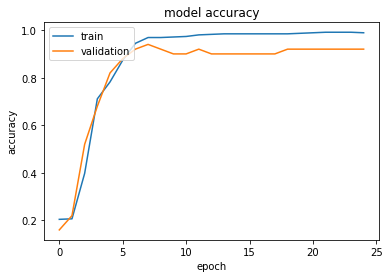

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

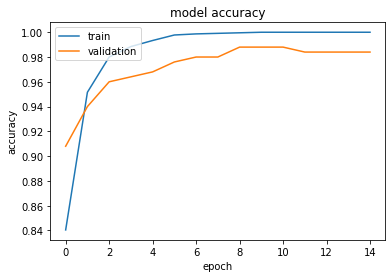

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

2/2 [==============================] - 4s 61ms/step - loss: 0.1351 - accuracy: 0.9800


[0.13511432707309723, 0.9800000190734863]

*Coarse Train*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 0.9911111111111112


*Coarse Valid*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.92


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 0.98


*Misclassified Images*

IndexError: ignored

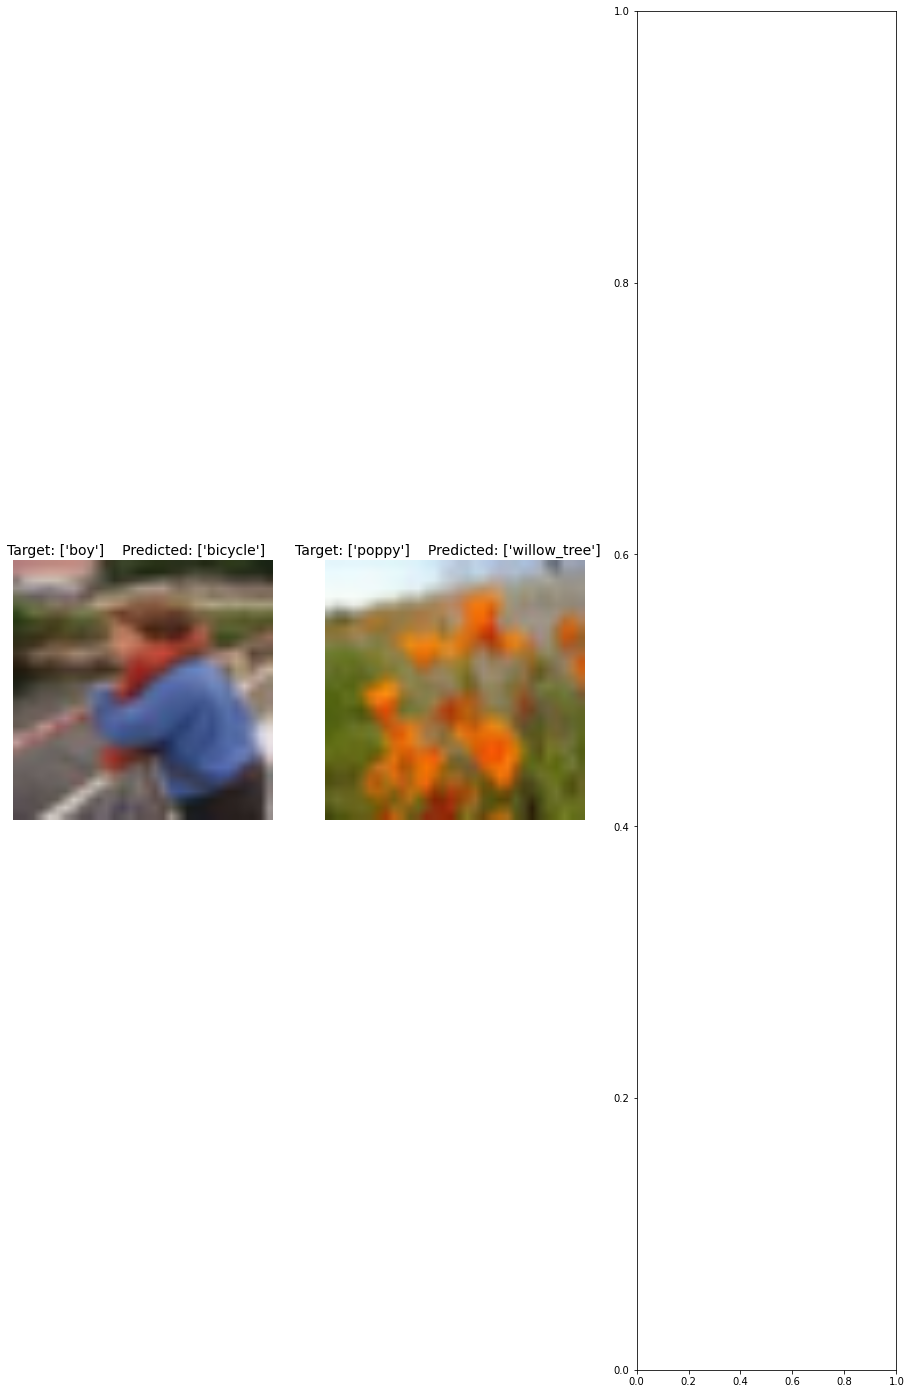

In [ ]:
# get misclassified images
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(27, 25))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

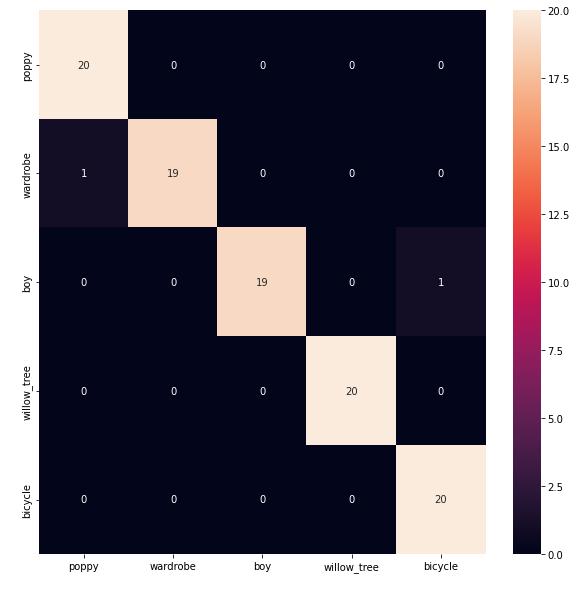

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

### Part 3B: Performance on "similar" classes
Repeat your analysis from Part 3A, but for 5 classes chosen from the SAME superclass.

Are your results different from 3A and from 2B?

#### Data
The chosen fine labels :  ['baby', 'boy', 'girl', 'man', 'woman'] </br>
The chosen coarse label: ['People']

In [ ]:
chosen_classes = [2, 11, 35, 46, 98]

In [ ]:
string_names = get_string_value(chosen_classes)

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_coarse[i] = elem

####*Training*

#####*Training using all data*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(5, activation="softmax")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 24.7 ms, sys: 39 µs, total: 24.8 ms
Wall time: 23.5 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
36/36 [==============================] - 20s 188ms/step - loss: 1.5841 - accuracy: 0.3204 - val_loss: 1.5042 - val_accuracy: 0.4200
Epoch 2/25
36/36 [==============================] - 4s 104ms/step - loss: 1.3854 - accuracy: 0.5338 - val_loss: 1.3454 - val_accuracy: 0.5120
Epoch 3/25
36/36 [==============================] - 4s 104ms/step - loss: 1.2179 - accuracy: 0.5822 - val_loss: 1.2212 - val_accuracy: 0.5320
Epoch 4/25
36/36 [==============================] - 4s 104ms/step - loss: 1.1017 - accuracy: 0.6107 - val_loss: 1.1407 - val_accuracy: 0.5480
Epoch 5/25
36/36 [==============================] - 4s 104ms/step - loss: 1.0246 - accuracy: 0.6231 - val_loss: 1.0884 - val_accuracy: 0.5840
Epoch 6/25
36/36 [==============================] - 4s 104ms/step - loss: 0.9685 - accuracy: 0.6453 - val_loss: 1.0537 - val_accuracy: 0.6040
Epoch 7/25
36/36 [==============================] - 4s 104ms/step - loss: 0.9235 - accuracy: 0.6604 - val_loss: 1.0297 - val_accuracy: 0.6120
Epoch

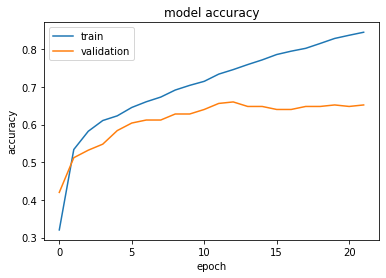

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
36/36 [==============================] - 57s 457ms/step - loss: 1.4236 - accuracy: 0.3853 - val_loss: 1.5536 - val_accuracy: 0.3360
Epoch 2/15
36/36 [==============================] - 14s 377ms/step - loss: 1.2355 - accuracy: 0.5240 - val_loss: 1.4393 - val_accuracy: 0.3760
Epoch 3/15
36/36 [==============================] - 14s 377ms/step - loss: 1.0785 - accuracy: 0.6333 - val_loss: 1.3915 - val_accuracy: 0.3960
Epoch 4/15
36/36 [==============================] - 14s 376ms/step - loss: 0.9418 - accuracy: 0.7213 - val_loss: 1.3551 - val_accuracy: 0.4200
Epoch 5/15
36/36 [==============================] - 14s 377ms/step - loss: 0.8181 - accuracy: 0.7947 - val_loss: 1.3256 - val_accuracy: 0.4320
Epoch 6/15
36/36 [==============================] - 14s 377ms/step - loss: 0.7085 - accuracy: 0.8547 - val_loss: 1.3012 - val_accuracy: 0.4480
Epoch 7/15
36/36 [==============================] - 14s 380ms/step - loss: 0.6109 - accuracy: 0.8987 - val_loss: 1.2813 - val_accuracy: 0.4520

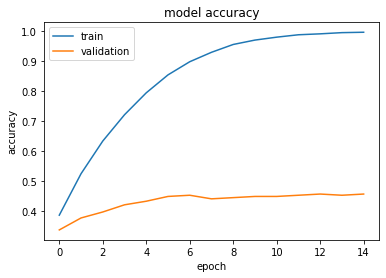

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

8/8 [==============================] - 1s 93ms/step - loss: 1.2176 - accuracy: 0.5020


[1.2175524234771729, 0.5019999742507935]

*Coarse train*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 1.0


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 1.0


*Misclassified Images*

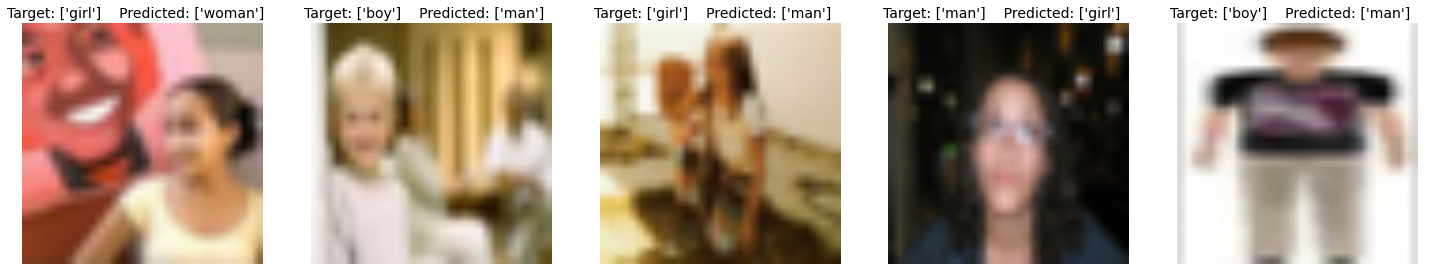

In [ ]:
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(25, 20))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

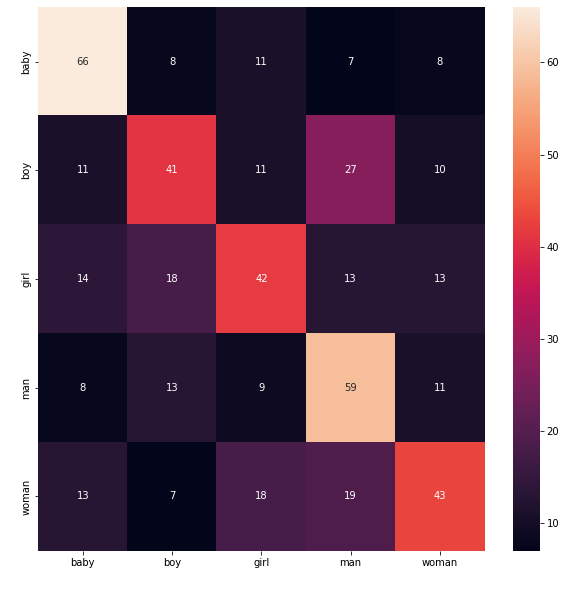

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

## Question 4: Performance on 2-class subset of CIFAR-100


### Part 4A: Performance on "different" classes
Create a binary classifier, choosing two classes from different superclasses.
Repeat analysis from Part 3A.

Are your results different than previous Parts?

#### Data
The chosen fine labels :  ['baby', 'oak_tree'] </br>
The chosen coarse label: ['People', 'Trees']

In [ ]:
chosen_classes = [2, 52]

In [ ]:
string_names = get_string_value(chosen_classes)
string_names

['baby', 'oak_tree']

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {} # de-codes 

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_label[i] = elem

#### *Training*

##### *Training 100% train and test set for selected fine labels*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(1, activation="sigmoid")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 16.7 ms, sys: 1.92 ms, total: 18.6 ms
Wall time: 18 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
15/15 [==============================] - 12s 265ms/step - loss: 0.6175 - accuracy: 0.7522 - val_loss: 0.4997 - val_accuracy: 0.9800
Epoch 2/25
15/15 [==============================] - 2s 111ms/step - loss: 0.3890 - accuracy: 0.9933 - val_loss: 0.2840 - val_accuracy: 0.9900
Epoch 3/25
15/15 [==============================] - 2s 102ms/step - loss: 0.2012 - accuracy: 0.9978 - val_loss: 0.1520 - val_accuracy: 0.9900
Epoch 4/25
15/15 [==============================] - 2s 100ms/step - loss: 0.1028 - accuracy: 0.9978 - val_loss: 0.0943 - val_accuracy: 0.9900
Epoch 5/25
15/15 [==============================] - 2s 100ms/step - loss: 0.0601 - accuracy: 0.9978 - val_loss: 0.0689 - val_accuracy: 0.9900
Epoch 6/25
15/15 [==============================] - 2s 100ms/step - loss: 0.0397 - accuracy: 0.9989 - val_loss: 0.0562 - val_accuracy: 0.9900
Epoch 7/25
15/15 [==============================] - 2s 101ms/step - loss: 0.0287 - accuracy: 0.9989 - val_loss: 0.0489 - val_accuracy: 0.9900
Epoch

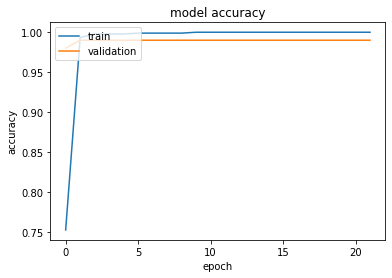

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
15/15 [==============================] - 45s 546ms/step - loss: 0.4397 - accuracy: 0.7956 - val_loss: 0.1355 - val_accuracy: 0.9500
Epoch 2/15
15/15 [==============================] - 5s 359ms/step - loss: 0.3018 - accuracy: 0.9222 - val_loss: 0.1488 - val_accuracy: 0.9700
Epoch 3/15
15/15 [==============================] - 5s 358ms/step - loss: 0.2137 - accuracy: 0.9711 - val_loss: 0.1884 - val_accuracy: 0.9500
Epoch 4/15
15/15 [==============================] - 5s 356ms/step - loss: 0.1557 - accuracy: 0.9911 - val_loss: 0.1817 - val_accuracy: 0.9700
Epoch 5/15
15/15 [==============================] - 5s 356ms/step - loss: 0.1168 - accuracy: 0.9989 - val_loss: 0.1656 - val_accuracy: 0.9700
Epoch 6/15
15/15 [==============================] - 5s 356ms/step - loss: 0.0897 - accuracy: 1.0000 - val_loss: 0.1487 - val_accuracy: 0.9700
CPU times: user 1min 9s, sys: 6.58 s, total: 1min 15s
Wall time: 1min 18s


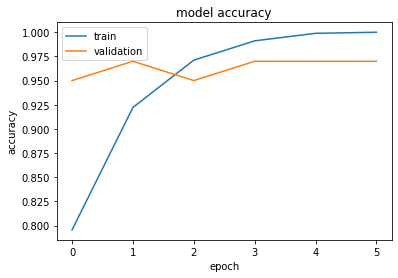

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

4/4 [==============================] - 0s 68ms/step - loss: 0.1221 - accuracy: 1.0000


[0.12214528024196625, 1.0]

*Coarse Training*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, no_features=True, binary=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 1.0


*Coarse validation*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True, binary=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 0.97


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test, binary=True)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
len(pred)

200

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 1.0


In [ ]:
len(target_fine_label)

200

*Misclassified Images*

In [ ]:
# get misclassified images
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(27, 25))
for index in range(len(misclassifiedIndexes)):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

<Figure size 1944x1800 with 0 Axes>

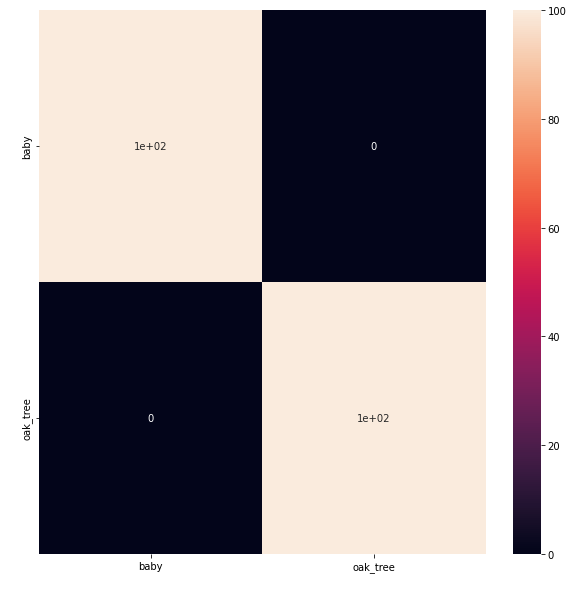

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

##### *Training 10% train and test set for selected fine labels*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 50)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 10)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(1, activation="sigmoid")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 17.7 ms, sys: 0 ns, total: 17.7 ms
Wall time: 17.3 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
2/2 [==============================] - 10s 2s/step - loss: 0.7608 - accuracy: 0.4889 - val_loss: 0.6790 - val_accuracy: 0.6000
Epoch 2/25
2/2 [==============================] - 0s 100ms/step - loss: 0.7224 - accuracy: 0.4889 - val_loss: 0.6505 - val_accuracy: 0.6000
Epoch 3/25
2/2 [==============================] - 0s 98ms/step - loss: 0.6893 - accuracy: 0.4889 - val_loss: 0.6216 - val_accuracy: 0.6000
Epoch 4/25
2/2 [==============================] - 0s 100ms/step - loss: 0.6579 - accuracy: 0.4889 - val_loss: 0.5918 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 0s 98ms/step - loss: 0.6254 - accuracy: 0.4889 - val_loss: 0.5610 - val_accuracy: 0.6000
Epoch 6/25
2/2 [==============================] - 0s 98ms/step - loss: 0.5918 - accuracy: 0.5000 - val_loss: 0.5298 - val_accuracy: 0.7000
Epoch 7/25
2/2 [==============================] - 0s 97ms/step - loss: 0.5582 - accuracy: 0.5889 - val_loss: 0.4983 - val_accuracy: 0.9000
Epoch 8/25
2/2 [==========

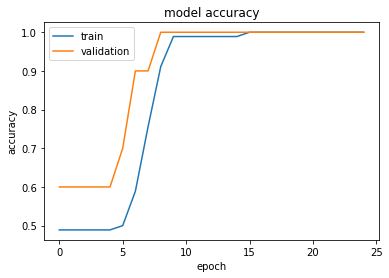

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
2/2 [==============================] - 36s 3s/step - loss: 0.5924 - accuracy: 0.8111 - val_loss: 0.1323 - val_accuracy: 1.0000
Epoch 2/15
2/2 [==============================] - 1s 234ms/step - loss: 0.5597 - accuracy: 0.8556 - val_loss: 0.1651 - val_accuracy: 1.0000
Epoch 3/15
2/2 [==============================] - 1s 235ms/step - loss: 0.5364 - accuracy: 0.8889 - val_loss: 0.2037 - val_accuracy: 1.0000
Epoch 4/15
2/2 [==============================] - 1s 235ms/step - loss: 0.5134 - accuracy: 0.9111 - val_loss: 0.2430 - val_accuracy: 1.0000
Epoch 5/15
2/2 [==============================] - 1s 237ms/step - loss: 0.4913 - accuracy: 0.9222 - val_loss: 0.2875 - val_accuracy: 1.0000
Epoch 6/15
2/2 [==============================] - 1s 236ms/step - loss: 0.4682 - accuracy: 0.9333 - val_loss: 0.3326 - val_accuracy: 1.0000
CPU times: user 39.4 s, sys: 1.03 s, total: 40.4 s
Wall time: 39.7 s


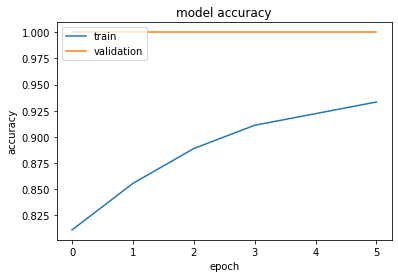

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

1/1 [==============================] - 0s 67ms/step - loss: 0.3133 - accuracy: 1.0000


[0.3133136034011841, 1.0]

*Coarse Training*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, no_features=True, binary=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 1.0


*Coarse Valid*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
valid_fine_label, valid_pred = get_predictions(ds_valid, no_features=True, binary=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
valid_fine_label = convert_label(valid_fine_label, index_to_label)
valid_pred = convert_label(valid_pred, index_to_label)

In [ ]:
# Coarse valid accuracy
coarse_valid_accuracy = calculate_coarse_accuracy(valid_pred, valid_fine_label)

Coarse Label(super class) accuracy: 1.0


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred = get_predictions(ds_test, binary=True)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 1.0


*Misclassified Images*

In [ ]:
# get misclassified images
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(27, 25))
for index in range(len(misclassifiedIndexes)):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

<Figure size 1944x1800 with 0 Axes>

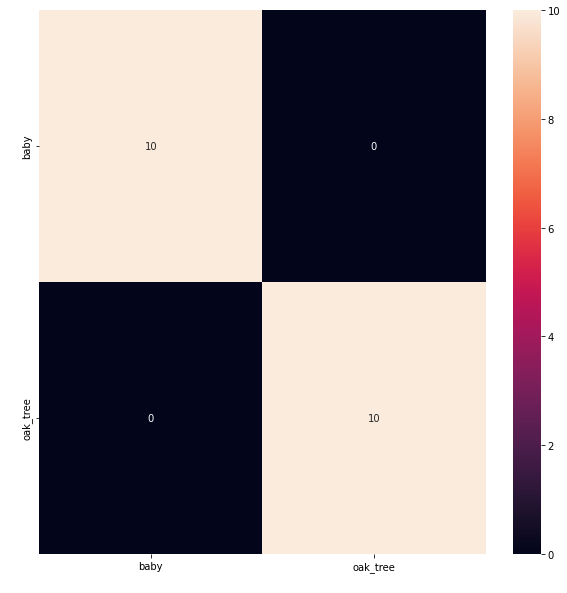

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

### Part 4B: Performance on "similar" classes
Choose your two classes from the same superclass, and repeat analysis.

What are your results?

#### *Data*
The chosen fine labels :  ['boy', 'man'] </br>
The chosen coarse label: ['People']

In [ ]:
chosen_classes = [11, 46]

In [ ]:
string_names = get_string_value(chosen_classes)
string_names

['boy', 'man']

In [ ]:
# dicts used to encode labels based on index 
fine_to_index ={}
index_to_label = {}

for i, elem in enumerate(chosen_classes):
  fine_to_index[elem] = i
  index_to_label[i] = elem

#### *Training*

##### *Training using all data*

In [ ]:
# filter datset to get chosen classes and correct count for each class
x_train_tr, y_train_tr = filter_classes(chosen_classes, x_train_full, y_train_full, 500)
x_test, y_test = filter_classes(chosen_classes, x_test_full, y_test_full, 100)

In [ ]:
# encode class labels 
y_train_tr = np.array(convert_label(y_train_tr, fine_to_index))
y_test = np.array(convert_label(y_test, fine_to_index))

In [ ]:
x_train_tr, x_train_v, y_train_tr, y_train_v = train_test_split(x_train_tr,
                                                                y_train_tr,
                                                                test_size=0.1, random_state=22)

In [ ]:
# Convert from numpy data to tf.data.Dataset (training and validation)
ds_train, ds_valid, ds_test = convert_to_datasets((x_train_tr, y_train_tr), (x_train_v, y_train_v), (x_test, y_test))

In [ ]:
base_model = keras.applications.EfficientNetV2B3(weights="imagenet", 
                                              include_top=False,
                                             input_shape=(224,224,3))
global_avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
dropout = keras.layers.Dropout(0.005)(global_avg) 
dense_layer = keras.layers.Dense(300, activation="relu")(dropout)
dense_layer_1 = keras.layers.Dense(150, activation="sigmoid")(dense_layer)
output = keras.layers.Dense(1, activation="sigmoid")(dense_layer_1)
model = keras.models.Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze transferred layers and train
%%time
for layer in base_model.layers:
    layer.trainable = False

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-4),
                metrics=["accuracy"])

CPU times: user 30.5 ms, sys: 0 ns, total: 30.5 ms
Wall time: 28.7 ms


In [ ]:
%%time
history = model.fit(ds_train, 
                    epochs=25, validation_data=ds_valid, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/25
15/15 [==============================] - 15s 291ms/step - loss: 0.7240 - accuracy: 0.5133 - val_loss: 0.7264 - val_accuracy: 0.3900
Epoch 2/25
15/15 [==============================] - 2s 104ms/step - loss: 0.6404 - accuracy: 0.6844 - val_loss: 0.6528 - val_accuracy: 0.5900
Epoch 3/25
15/15 [==============================] - 2s 105ms/step - loss: 0.5847 - accuracy: 0.7611 - val_loss: 0.6167 - val_accuracy: 0.6300
Epoch 4/25
15/15 [==============================] - 2s 105ms/step - loss: 0.5314 - accuracy: 0.7889 - val_loss: 0.5894 - val_accuracy: 0.6300
Epoch 5/25
15/15 [==============================] - 2s 104ms/step - loss: 0.4860 - accuracy: 0.8056 - val_loss: 0.5713 - val_accuracy: 0.6300
Epoch 6/25
15/15 [==============================] - 2s 105ms/step - loss: 0.4512 - accuracy: 0.8122 - val_loss: 0.5613 - val_accuracy: 0.6400
Epoch 7/25
15/15 [==============================] - 2s 105ms/step - loss: 0.4232 - accuracy: 0.8267 - val_loss: 0.5559 - val_accuracy: 0.6500
Epoch

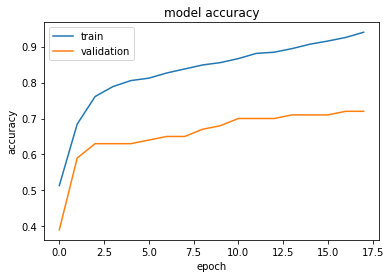

In [ ]:
plot_train_hist(history)

In [ ]:
# Unfreeze layers and train
for layer in base_model.layers:
    layer.trainable = True

model.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.Nadam(1e-5), 
                metrics=["accuracy"])

In [ ]:
%%time
n_epochs = 15
history_2 = model.fit(ds_train,
                    epochs=n_epochs,
                    validation_data=ds_valid,
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/15
15/15 [==============================] - 56s 581ms/step - loss: 0.6354 - accuracy: 0.6233 - val_loss: 0.6406 - val_accuracy: 0.5900
Epoch 2/15
15/15 [==============================] - 6s 371ms/step - loss: 0.5509 - accuracy: 0.7311 - val_loss: 0.6687 - val_accuracy: 0.5800
Epoch 3/15
15/15 [==============================] - 6s 371ms/step - loss: 0.4808 - accuracy: 0.8167 - val_loss: 0.7179 - val_accuracy: 0.5600
Epoch 4/15
15/15 [==============================] - 6s 371ms/step - loss: 0.4157 - accuracy: 0.8778 - val_loss: 0.6878 - val_accuracy: 0.5800
Epoch 5/15
15/15 [==============================] - 6s 370ms/step - loss: 0.3593 - accuracy: 0.9311 - val_loss: 0.6853 - val_accuracy: 0.5900
Epoch 6/15
15/15 [==============================] - 6s 372ms/step - loss: 0.3103 - accuracy: 0.9500 - val_loss: 0.6806 - val_accuracy: 0.5900
CPU times: user 1min 26s, sys: 5.92 s, total: 1min 32s
Wall time: 1min 28s


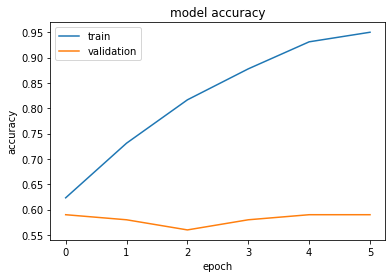

In [ ]:
plot_train_hist(history_2)

In [ ]:
# evaluate test set 
model.evaluate(ds_test)

4/4 [==============================] - 0s 73ms/step - loss: 0.6016 - accuracy: 0.6650


[0.6015807390213013, 0.6650000214576721]

*Coarse Train*

In [ ]:
# labels, predicitions using training set for coarse labels prediction
train_label, train_pred = get_predictions(ds_train, no_features=True)

In [ ]:
# currently labels are encoded as their index 
# convert index to fine label
train_label = convert_label(train_label, index_to_label)
train_pred = convert_label(train_pred, index_to_label)

In [ ]:
# Coarse training accuracy
coarse_train_accuracy = calculate_coarse_accuracy(train_pred, train_label)

Coarse Label(super class) accuracy: 1.0


*Coarse Test*

In [ ]:
# features(images), labels, predicitions using test set for coarse labels prediction
test_images, target_fine_label, pred =  get_predictions(ds_test, binary=True)

In [ ]:
# labels are currently encoded as their index 
# convert index to fine label
target_fine_label = convert_label(target_fine_label, index_to_label)
pred = convert_label(pred, index_to_label)

In [ ]:
# Coarse test accuracy
coarse_test_accuracy = calculate_coarse_accuracy(pred, target_fine_label)

Coarse Label(super class) accuracy: 1.0


*Misclassified Images*

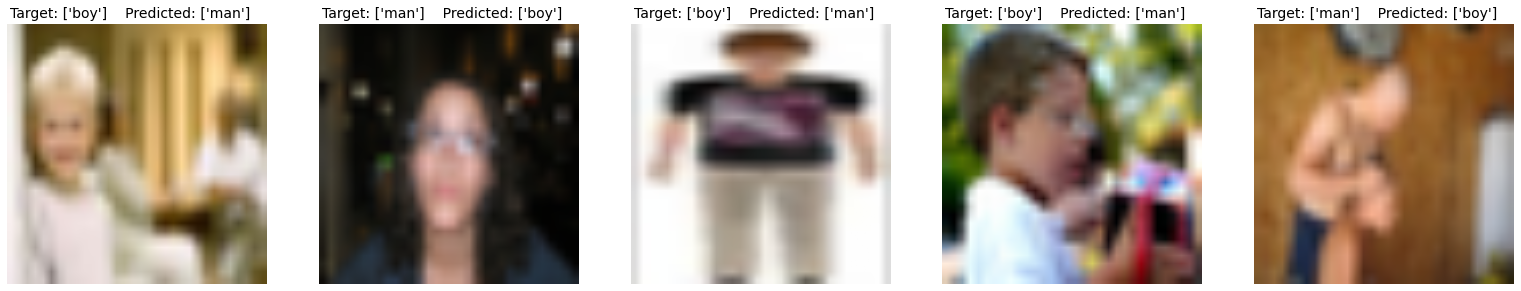

In [ ]:
# get misclassified images
misclassifiedIndexes = []
index = 0
for target, predict in zip(target_fine_label, pred):
  if target != predict:
    misclassifiedIndexes.append(index)
  index += 1

# print misclassified images
plt.figure(figsize=(27, 25))
for index in range(5):
  plt.subplot(1, 5 , index+1)
  plt.imshow(test_images[misclassifiedIndexes[index]] / 255, cmap='binary')
  plt.axis('off')
  plt.title(f'Target: {fine_labels[target_fine_label[misclassifiedIndexes[index]]]}    Predicted: {fine_labels[pred[misclassifiedIndexes[index]]]}   ', fontsize=14)

plt.show()

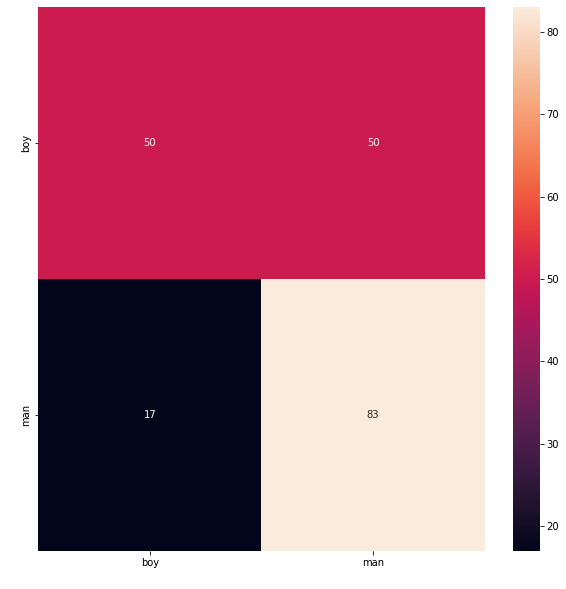

In [ ]:
#confusion matrix of coarse labels (fine labels)
cm = confusion_matrix(target_fine_label, pred)
cm_df = pd.DataFrame(cm, index=string_names, columns=string_names)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.ylabel('True class', color='white')
plt.xlabel('Predicted class', color='white')
#plt.tick_params(color='white',labelcolor='white')
plt.show()

## Question 5: Summarize your findings
Are there any mathematical relationships between number of classes, accuracy, and number of images used in training data? Did it make a difference if the classes were different or similar? Provide any other analyses or interesting insights.

 ***Model structure:***</br>
EfficientNetV2B3 </br>
DropOut (0.005)</br>
AveragePooling layer</br>
Dense Layer(Activation=relu,units=300)</br>
Dense Layer(Activation=sigmoid,units=150)</br>
Dense Layer(Activation=softmax,units=20)</br>*
*Loss Function: sparse_categorical_crossentropy</br>
Optimizer : Nadam</br>*

*Note: For Binary classiication </br>*
*Output Layer : Dense Layer(Activation=sigmoid,units=1)</br>*
*Loss Function: binary_crossentropy </br>*

*Note: Percentage is amount of data used from both Training and Testing set. Validation set is always 10% of Train*

***Approach: </br>***
*I trained the model using the fine labels as the target variables, and made predictions using the fine lables. <br>*
*To get the accuracy and predictions for the coarse labels I utiliized two methods*</br>
   1. *I predicted the target values for the training, validation, and testing set using models trained on fine labels.* </br>
   a. *After getting the predicted values, I converted the 
predicted and actual values to their respective super classes for each set.*</br> 
b. *Calculated the accuracy by incremenating 1 if the target was equal to the predicted for all values in a set, and dividing by the length of the set*</br>
   2. *I trained the a model of the same architecture but utilized the coarse labels as the target labels*</br>



***Results: </br>***
Question 1:

  1. *Model trained on fine labels:*</br>
      Predicting on fine labels:</br>
      Training: 99.85%, Validation: 81.84%, Testing: 81.45%</br> 

      Predicting on coarse labels:</br>
      Training: 99.43%, Validation: 90.32%, Testing: 90.07%</br>
 
  2. *Model trained on coarse labels:*</br>
      Predicting on coarse labels:</br>
      Training: 100%, Validation: 88.16%, Testing: 88.31%</br>

Question 2A:
  *Contains one sub-class class per super class*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 100%, Validation: 90.20%, Testing: 91.35%</br> 

      Predicting on coarse labels:</br>
      Training: 99.73%, Testing: 91.35%*</br>
 
  2. *Model trained on fine labels utilizing 50%:</br>
      Predicting on fine labels:</br>
      Training: 100%, Validation: 90.60%, Testing: 89.20%*</br>

      *Predicting on coarse labels:</br>
      Training: 99.80%,  Testing: 89.20%</br>*

  3. *Model trained on fine labels utilizing 20%:</br>
      Predicting on fine labels:</br>
      Training: 99.50%, Validation: 85.50%, Testing: 85.50%*</br>

      *Predicting on coarse labels:</br>
      Training:  99.50%, Validation: 85.50%, Testing: 85.50%</br>*


Question 2B:
   *Contains five sub-classes class from four similar super classes*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 99.82%, Validation: 75.40%, Testing: 73.55%*</br> 

      Predicting on coarse labels:</br>
      Training: 99.66%, Validation: 84.60%, Testing: 84.60%</br>
 
  2. *Model trained on coarse labels utilizing 100%:</br>
      Predicting on coarse labels:</br>
      Training: 100%, Validation: 73.50%, Testing: 69.74%*</br>


Question 3A:
   *Contains five sub-classes class from five different super classes*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 100%, Validation: 98.40%, Testing: 97.80%*</br> 

      *Predicting on coarse labels:</br>
      Training: 99.55%, Validation: 98.40%, Testing: 97.80%*</br>
 
  2. *Model trained on fine labels utilizing 20%:</br>
      Predicting on fine labels:</br>
      Training: 98.89%, Validation: 92.00%, Testing: 98.00%*</br>

      *Predicting on coarse labels:</br>
      Training: 99.11%, Validation: 92.00%, Testing: 98.00%*</br>

Question 3B:
   *Contains five sub-classes class from one super classes*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 99.73%, Validation: 45.60%, Testing: 50.20%*</br> 

      *Predicting on coarse labels:</br>
      Training: 100%, Testing: 100%*</br>

Question 4A:
   *Contains two sub-classes class from the two different super class*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 100%, Validation: 97.00%, Testing: 100%*</br> 

      *Predicting on coarse labels:</br>
      Training:100%,  Validation: 97.00%, Testing: 100%*</br>
 
  2. *Model trained on fine labels utilizing 10%:</br>
      Predicting on fine labels:</br>
      Training: 93.33%, Validation: 100%, Testing: 100%*</br>

      *Predicting on coarse labels:</br>
      Training: 100%, Validation: 100%, Testing: 100%*</br>

Question 4B:
   *Contains two sub-classes class from one super classes*
  1. *Model trained on fine labels utilizing 100%:</br>
      Predicting on fine labels:</br>
      Training: 95.00%, Validation: 59.00%, Testing: 66.50%</br> 

      Predicting on coarse labels:</br>
      Training: 100%, Testing: 100%*</br>

***Findings***

The most important factors for accuracy is the similarity between classes, and the number classes been predicted.</br> 

For both fine and coarse labels classes, the higher the similarity between classes the more data ( > 100%) required. Results for similar subclasses in questions 2,3,4 show that we couldn't achieve a similar accuracy compared to the accuracy recorded in question 1. The more classes we are predicting on, the better the accuracy. This probably to help the models learn the distinguishing features.</br>

For both fine and coarse labels classes, the lower the similarity between classes the higher the accuracy. They require less data, but they produce lower accuracies when predicting for more classes. Results show that when we predicited 20 subclasses from different superclasses utilizing only 20% of data we still get better accuracies than question 1.</br>


Overall when predicting different and similar classes, using the first approach to classify coarse labels performed better.</br> For different superclasses I decided not to train a model on coarse labels because each subclass came from a unique super class.</br>
The models trained on coarse labels produced worse results comnpared to results produced using the first approach(Trained on fine labels then converted to respective super class).


